In [1]:
#Import modules
import pyodbc
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import pyplot

import seaborn as sns

from sklearn import svm
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.utils import shuffle
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier

from xplore import Xplorer

import warnings
warnings.filterwarnings('ignore')

#1 = Sliding
#0 = Rotating

# Engels Questions

## What is error
## How do we show the event prior to the event
## Quantative measurement based on time and depth
## Time series

## start model on just time then distance or vice versus then maybe both if needed

## want to be early on prediction and never late
## use absolute time differential before concentrating 
#


# Data Import

In [3]:
#Connect to DB
conn = pyodbc.connect('Driver={SQL Server};'
                      'Server=DESKTOP-LFP2E23\SQLEXPRESS;'
                      #'Server=jvsql02;'
                      'Database=ML;'
                      'Trusted_Connection=yes;')

#Select the data from the table
SQL_Query = pd.read_sql_query(
'''select * from ML.dbo.TCR_ML_WELLS_Time_Analysis_Full''', conn)

In [4]:
#Convert the query to a data frame
df_raw = pd.DataFrame(SQL_Query, columns=              
    [
        'WellName','ReportDateTime','AccumulatedConnectionTime','AccumulatedFillupStrokes','AccumulatedFillupVolume'
,'ADAutoDrillerRunning','ADAuxiliary1','ADAuxiliary2','ADAuxiliary3','ADAuxiliary4','ADAuxiliary5'
,'ADDifferentialPressureActualValue','ADDifferentialPressureLimitValue','ADDifferentialPressureSetpointValue','ADDPEnabled'
,'ADHookloadSlider','ADROPActualValue','ADROPCruiseControlEnabled','ADROPSetpointValue','ADSPPSlider','ADSystemEnabled'
,'ADWOBActualValue','ADWOBEnabled','ADWOBLimitValue','ADWOBSetpointValue','BitArea','BitNozzleTotalFlowArea','BitRPM'
,'BitTime_OffBottom','BitTime_OnBottom','BlockPosition','CasingPressure','CoilEngaged','ConnectionCounter'
,'CurrentConnectionTime','Date','DateDateOnly','DateTimeOnly','Depth_Bit','DepthHoleTVD','DifferentialPressure'
,'DrillCabTDSUTemp','DrillMode','DynamicVariable06','DynamicVariable09','DynamicVariable10','EC1Active','EC1ActivityCode1'
,'EC1ActivityCode2','EC1ActivityCode3','EC1ActivityCode4','EC1ActivityCode5','EC1Authorized','EC1DPModeOn','EC1DPModeOnReq'
,'EC1DPSPActual','EC1DPSPRecommended','EC1Ready','EC1ROPSPActual','EC1ROPSPRecommended','EC1WOBModeOn','EC1WOBModeOnReq'
,'EC1WOBSPActual','EC1WOBSPRecommended','FlowIn','GasTotal_units','H2S04','H2S08','H2S09','H2S11','Hookload'
,'HookloadInline','HookloadString','JobPumpVolumeTotal','JobStrokesTotal','LagDepthGas','LEL01','LEL02','LEL03','LEL04'
,'LEL05','LEL06','LEL07','LEL08','LEL09','LEL10','LEL11','LEL12','MudMotorRPM','MWDAzimuth'
,'MWDContinuousInclination','MWDGammaAPI','MWDInclination','MWDSrvToolfaceAdvisory','MWDSrvToolfaceLimits'
,'OnBottom','OverPull','Pit01Volume','Pit02Volume','Pit03Volume','Pit04Volume','Pit05GL','Pit06Volume','Pit07Volume'
,'PitGLActive','PitGLCompanyMan','PitGLMudLogger','PitGLMWD','PitGLSignature','PitVolumeActive','PitVolumeTotal'
,'PLCStatus','PreviousConnectionTime','PumpOffTime','PumpOnTime','PumpPressure','PumpsOn','PumpVolumeTotal','ReturnFlow'
,'ReturnFlowDetected','REVitEnabled','REVitUsageAlert','ROCKIT_BearingActualRW','ROCKIT_HITRQLeft','ROCKIT_HITRQLeftPercent'
,'ROCKIT_HITRQRight','ROCKIT_HITRQRightPercent','ROCKIT_OnOff','ROCKIT_OscillationLeftRW','ROCKIT_OscillationRightRW'
,'ROCKIT_PILOTOnOff','ROCKIT_ResultantToolface','ROCKIT_RPMRW','ROCKIT_ScoreCardRW','ROCKIT_SlidetoMDRW','ROCKIT_TFtoRW'
,'ROP5xDepthhour','ROPDepth_StepDepthHour','ROPDepthHour','ROPMax','ROPMinuteDepth','ROPTimeDepthHour','RotaryRPM'
,'RunningSpeedDown','RunningSpeedUp','SeperatorFlow','SlipsSet','SPM1','SPM2','SPMTotal','StaticInjectorForce'
,'STCfActualNm_Sec','STKfActualNm','Strokes1','Strokes1CompanyMan','Strokes2','Strokes2CompanyMan','StrokesTotal'
,'StrokesTotalCompanyMan','StrokesTotalMudLogger','TDOilSensorBypassAlarm','TDOilType','TDPLCAlarm1','TDPLCAlarm4'
,'TDQuillPosition','TDS_AmbientTemperature','TDS_BrakeTemperature','TDS_HPUOilTankTemperature','TDS_HydraulicTemperature'
,'TDS_LowerBearingTemp','TDS_LubeOilAfterFilterPres','TDS_LubeOilPressure','TDS_LubeOilTemperature'
,'TDS_MotorWindingTemperature1','TDS_MotorWindingTemperature2','TDS_MotorWindingTemperature3ACOnly'
,'TDS_OilPressureAcrosstheFilter','TDS_UpperBearingTemp','TDSRotaryTorqueLimit','TDTorqueInline','TongMakeupStartPressure'
,'TonMilesEventCumulative','TonMilesMegajoules','TopDriveRPM','TopDriveRPMCommand','TopDriveTorqueCommand'
,'TopDriveTorqueft_lbs','TorqueDelta','TorqueTare','TripGL','TripGLCompanyMan','TripGLSignature','TripModeAccumulation'
,'TripModeFillupStrokes','TripVolumeActive','UnderPull','VFDVariable10','VFDVariable9','WeightonBit'
            ])



In [5]:
df_raw.head(2)

,WellName,ReportDateTime,AccumulatedConnectionTime,AccumulatedFillupStrokes,AccumulatedFillupVolume,ADAutoDrillerRunning,ADAuxiliary1,ADAuxiliary2,ADAuxiliary3,ADAuxiliary4,...,TripGL,TripGLCompanyMan,TripGLSignature,TripModeAccumulation,TripModeFillupStrokes,TripVolumeActive,UnderPull,VFDVariable10,VFDVariable9,WeightonBit
0,LANGE_A_N048HM_TIME.csv,2018-07-19 19:47:20,3.613368e+09,0.0,0.0,-1.0,65.228508,60.0,0.0,256.0,...,2.73727,-36.666672,3.614740e+09,0.0,0.0,3.61256,0.0,0.0,0.0,22.556601
1,LANGE_A_N048HM_TIME.csv,2018-07-19 19:47:30,3.613368e+09,0.0,0.0,-1.0,64.919571,60.0,0.0,256.0,...,2.73727,-36.666672,3.614740e+09,0.0,0.0,3.61256,0.0,0.0,0.0,23.072491


### Create Index Column

In [6]:
#Convert the query to a data frame
df_time_indexed = df_raw.set_index('ReportDateTime')
df_time_indexed.head(5)

,WellName,AccumulatedConnectionTime,AccumulatedFillupStrokes,AccumulatedFillupVolume,ADAutoDrillerRunning,ADAuxiliary1,ADAuxiliary2,ADAuxiliary3,ADAuxiliary4,ADAuxiliary5,...,TripGL,TripGLCompanyMan,TripGLSignature,TripModeAccumulation,TripModeFillupStrokes,TripVolumeActive,UnderPull,VFDVariable10,VFDVariable9,WeightonBit
ReportDateTime,,,,,,,,,,,,,,,,,,,,,
2018-07-19 19:47:20,LANGE_A_N048HM_TIME.csv,3.613368e+09,0.0,0.0,-1.0,65.228508,60.0,0.0,256.0,42.0,...,2.73727,-36.666672,3.614740e+09,0.0,0.0,3.61256,0.0,0.0,0.0,22.556601
2018-07-19 19:47:30,LANGE_A_N048HM_TIME.csv,3.613368e+09,0.0,0.0,-1.0,64.919571,60.0,0.0,256.0,42.0,...,2.73727,-36.666672,3.614740e+09,0.0,0.0,3.61256,0.0,0.0,0.0,23.072491
2018-07-19 19:47:40,LANGE_A_N048HM_TIME.csv,3.613368e+09,0.0,0.0,-1.0,64.930222,60.0,0.0,256.0,42.0,...,2.73727,-36.666672,3.614740e+09,0.0,0.0,3.61256,0.0,0.0,0.0,22.578230
2018-07-19 19:47:50,LANGE_A_N048HM_TIME.csv,3.613368e+09,0.0,0.0,-1.0,65.015442,60.0,0.0,256.0,42.0,...,2.73727,-36.666672,3.614740e+09,0.0,0.0,3.61256,0.0,0.0,0.0,22.413420
2018-07-19 19:48:00,LANGE_A_N048HM_TIME.csv,3.613368e+09,0.0,0.0,-1.0,64.717163,60.0,0.0,256.0,42.0,...,2.73727,-36.666672,3.614740e+09,0.0,0.0,3.61256,0.0,0.0,0.0,22.284439


In [7]:
df_time_indexed.drop([ 'AccumulatedFillupStrokes', 'AccumulatedFillupVolume', 'ADAuxiliary2', 'ADAuxiliary3', 'ADAuxiliary4', 'ADAuxiliary5', 'BitArea', 'BitNozzleTotalFlowArea', 'CoilEngaged', 'CurrentConnectionTime'
, 'DrillMode', 'DynamicVariable09', 'EC1Active', 'EC1ActivityCode1', 'EC1ActivityCode2', 'EC1ActivityCode3', 'EC1ActivityCode4', 'EC1ActivityCode5', 'EC1Authorized', 'EC1DPModeOn', 'EC1DPModeOnReq'
, 'EC1DPSPActual', 'EC1DPSPRecommended', 'EC1Ready', 'EC1ROPSPActual', 'EC1ROPSPRecommended', 'EC1WOBModeOn', 'EC1WOBModeOnReq', 'EC1WOBSPActual', 'EC1WOBSPRecommended', 'H2S08', 'H2S09'
, 'HookloadInline', 'LEL01', 'LEL03', 'LEL05', 'LEL06', 'LEL08', 'LEL09', 'LEL10', 'LEL12', 'MudMotorRPM', 'OnBottom', 'PLCStatus', 'REVitEnabled', 'REVitUsageAlert', 'ROCKIT_PILOTOnOff', 'SlipsSet'
, 'StaticInjectorForce', 'STCfActualNm_Sec', 'STKfActualNm', 'TDOilSensorBypassAlarm', 'TDOilType', 'TDTorqueInline', 'TongMakeupStartPressure', 'TorqueTare', 'UnderPull', 'VFDVariable10', 'VFDVariable9'
, 'H2S04', 'LEL02', 'LEL11', 'SeperatorFlow', 'H2S11', 'Date', 'DateDateOnly', 'DateTimeOnly', 'AccumulatedConnectionTime', 'ADAutoDrillerRunning', 'ADDPEnabled', 'ADROPCruiseControlEnabled', 'ADSystemEnabled', 'ADWOBEnabled'
, 'TripModeAccumulation', 'TripModeFillupStrokes', 'ADAuxiliary1'
        ], axis=1, inplace=True)
#, 'ReportDateTime'
#, 'WellName'
#ADAuxiliary1 - removed as per vendor (user defined)

In [8]:
df_time_indexed.drop(['WellName'], axis=1, inplace=True)

# Exploratory Data Analysis - Before Resampled and Feature Selection

In [9]:
label_column =  'ROCKIT_OnOff'
eda = Xplorer(df=df_time_indexed, y = label_column)

Cannot log read_data properly.


## General data statistics

In [10]:
eda.print_stats()

 
Diagnostic Report:
 
-- Type Table --
         Count
Type          
float64    121
 
Number of observations:	 725789
Number of features:	 121
Observations with at least 1 missing value(s): 35687 (0.04916993781939379%)
Features with at least 1 missing value(s): 16 (0.1322314049586777%)
 
-- Missing Cells Table --
                                     na_count  na_percentage
ADDifferentialPressureActualValue           0       0.000000
ADDifferentialPressureLimitValue            0       0.000000
ADDifferentialPressureSetpointValue         0       0.000000
ADHookloadSlider                            0       0.000000
ADROPActualValue                            0       0.000000
ADROPSetpointValue                          0       0.000000
ADSPPSlider                                 0       0.000000
ADWOBActualValue                            0       0.000000
ADWOBLimitValue                             0       0.000000
ADWOBSetpointValue                          0       0.000000
BitRPM       

count    725788.000000
mean        298.947396
std         363.582633
min       -4387.032715
25%         210.393631
50%         321.429413
75%         436.350327
max        1742.518677
Name: DifferentialPressure, dtype: float64
 
===== Column: 'DrillCabTDSUTemp' =====
count    725789.000000
mean         31.556385
std          40.701351
min         -56.382092
25%           0.000000
50%           0.000000
75%          81.320000
max         323.000000
Name: DrillCabTDSUTemp, dtype: float64
 
===== Column: 'DynamicVariable06' =====
count    725789.000000
mean       3399.593617
std         705.509773
min           0.000000
25%        3001.450439
50%        3540.548096
75%        3897.887695
max        4858.293457
Name: DynamicVariable06, dtype: float64
 
===== Column: 'DynamicVariable10' =====
count    725789.000000
mean         57.734255
std          15.697493
min           0.000000
25%          43.509769
50%          58.188992
75%          71.159943
max         101.507980
Name: DynamicVari

count    7.257890e+05
mean     5.767054e+05
std      8.098072e+05
min      5.910087e+03
25%      2.554785e+05
50%      3.762811e+05
75%      5.477852e+05
max      4.496712e+06
Name: PumpOffTime, dtype: float64
 
===== Column: 'PumpOnTime' =====
count    7.257890e+05
mean     9.551865e+05
std      1.468024e+06
min      0.000000e+00
25%      3.672485e+05
50%      5.160326e+05
75%      8.293759e+05
max      1.054959e+07
Name: PumpOnTime, dtype: float64
 
===== Column: 'PumpPressure' =====
count    725775.000000
mean       3398.938230
std         705.279128
min           0.000000
25%        3000.395020
50%        3539.988281
75%        3897.147583
max        4747.198730
Name: PumpPressure, dtype: float64
 
===== Column: 'PumpsOn' =====
count    725775.000000
mean          0.991134
std           0.093743
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           1.000000
Name: PumpsOn, dtype: float64
 
===== Column: 'PumpVolumeTotal' =====
coun

count    7.257890e+05
mean     9.461991e+05
std      7.926892e+05
min      0.000000e+00
25%      3.631601e+05
50%      7.274420e+05
75%      1.323283e+06
max      3.734315e+06
Name: Strokes1CompanyMan, dtype: float64
 
===== Column: 'Strokes2' =====
count    7.257890e+05
mean     6.434957e+05
std      5.048450e+05
min      3.911900e+00
25%      2.640158e+05
50%      4.732860e+05
75%      9.701886e+05
max      2.106107e+06
Name: Strokes2, dtype: float64
 
===== Column: 'Strokes2CompanyMan' =====
count    7.257890e+05
mean     1.455071e+06
std      1.466658e+06
min      1.750000e+00
25%      5.281186e+05
50%      9.400587e+05
75%      1.855533e+06
max      5.809267e+06
Name: Strokes2CompanyMan, dtype: float64
 
===== Column: 'StrokesTotal' =====
count    7.257890e+05
mean     2.617178e+04
std      6.283421e+04
min      0.000000e+00
25%      5.933469e+03
50%      1.421448e+04
75%      3.242066e+04
max      1.787506e+06
Name: StrokesTotal, dtype: float64
 
===== Column: 'StrokesTotalCompan

count    725788.000000
mean         31.742361
std          12.485456
min           0.000000
25%          25.668378
50%          31.558595
75%          36.461553
max         167.377975
Name: WeightonBit, dtype: float64


In [11]:
columnNames = []

for col in df_time_indexed.columns: 
    columnNames.append(col)
    
df_time_indexed.columns[df_time_indexed.isna().any()].tolist()

['BitRPM',
 'DepthHoleTVD',
 'DifferentialPressure',
 'MWDAzimuth',
 'MWDContinuousInclination',
 'MWDGammaAPI',
 'PumpPressure',
 'PumpsOn',
 'ReturnFlow',
 'ReturnFlowDetected',
 'ROCKIT_HITRQLeftPercent',
 'ROCKIT_HITRQRightPercent',
 'ROPDepth_StepDepthHour',
 'RotaryRPM',
 'TorqueDelta',
 'WeightonBit']

In [12]:
#remove columns with null values
for col in df_time_indexed.columns[df_time_indexed.isna().any()].tolist():
    columnNames.remove(col)

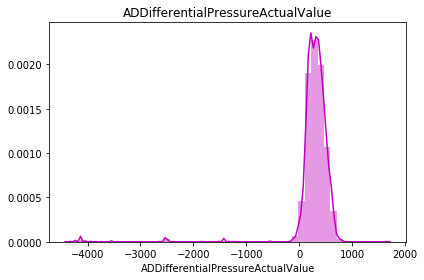

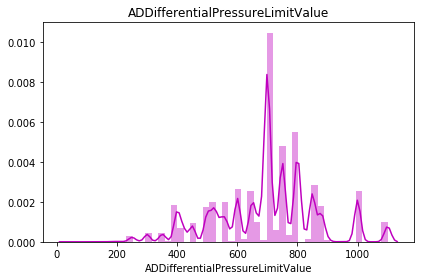

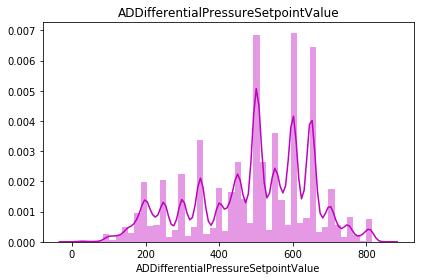

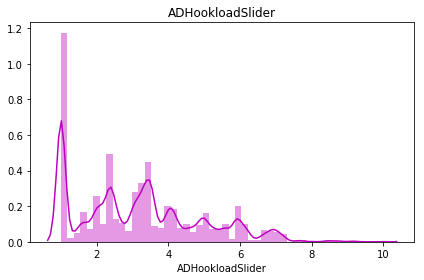

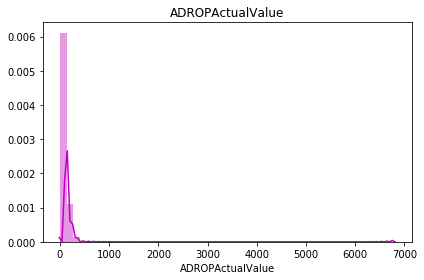

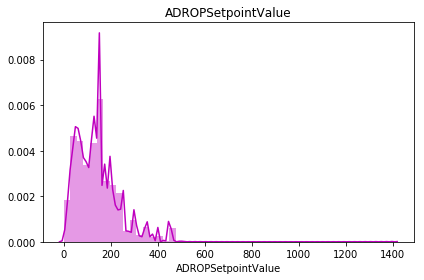

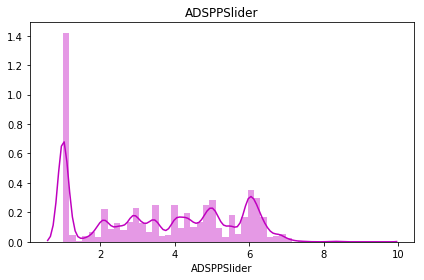

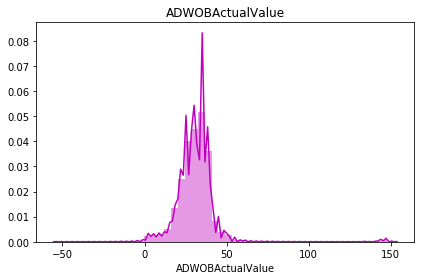

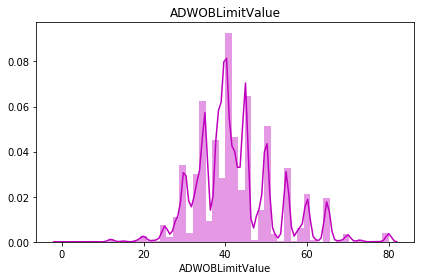

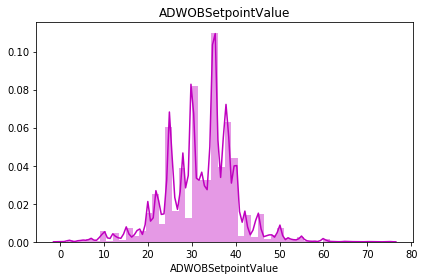

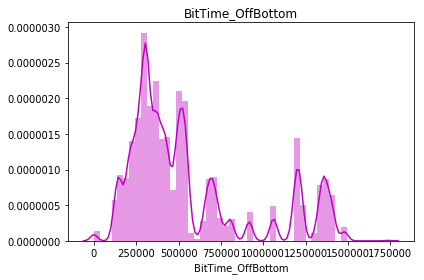

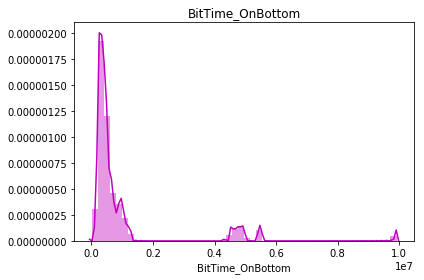

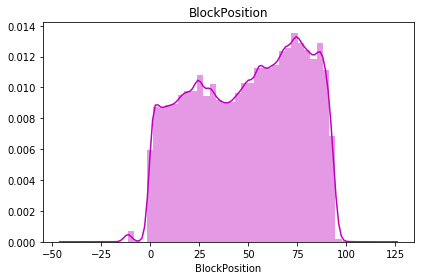

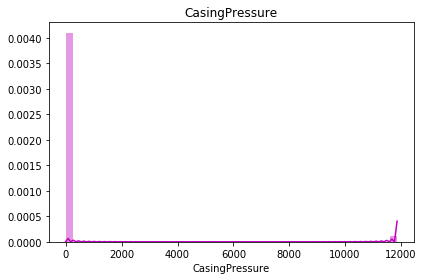

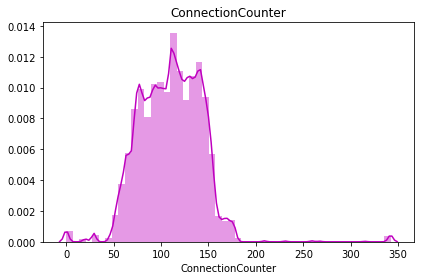

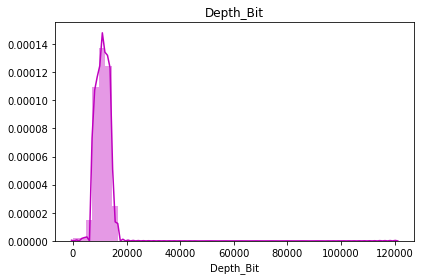

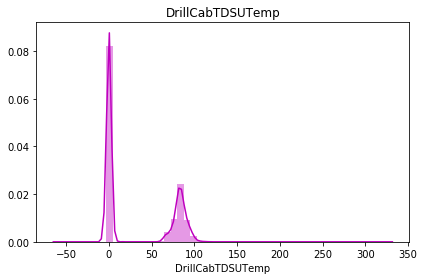

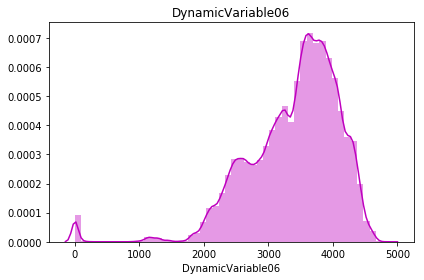

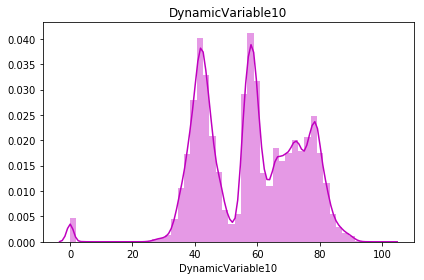

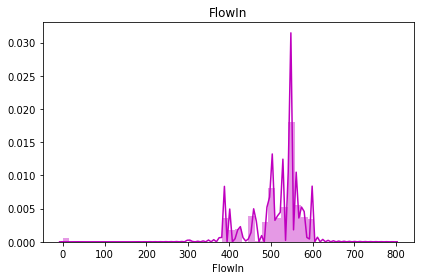

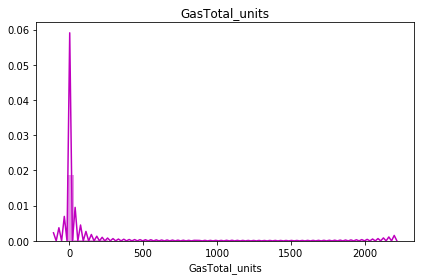

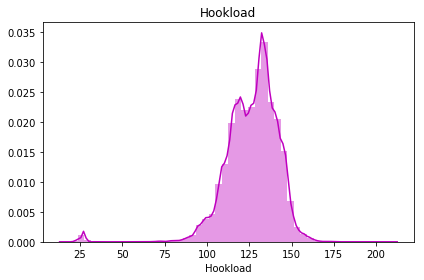

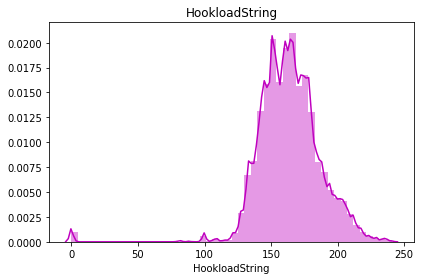

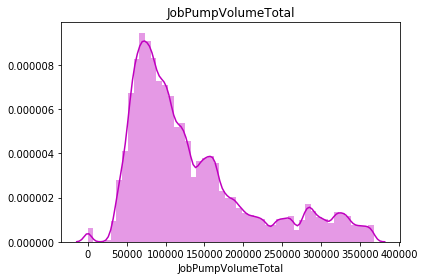

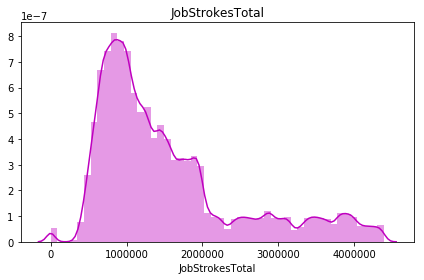

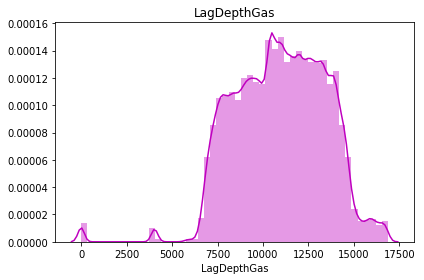

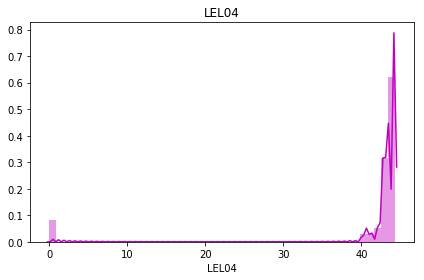

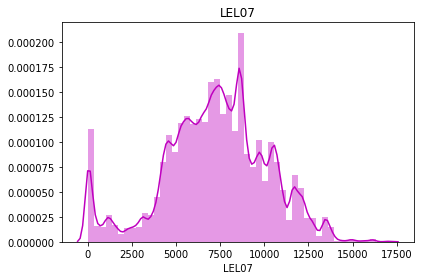

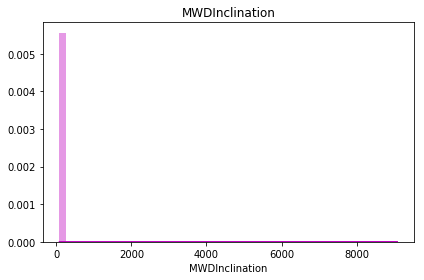

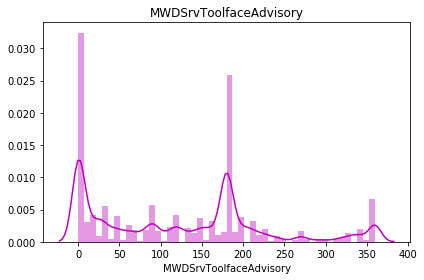

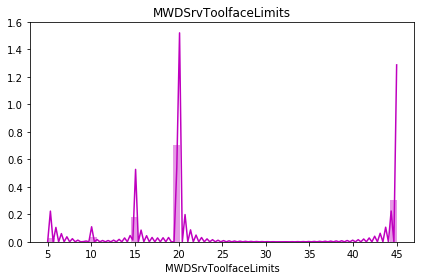

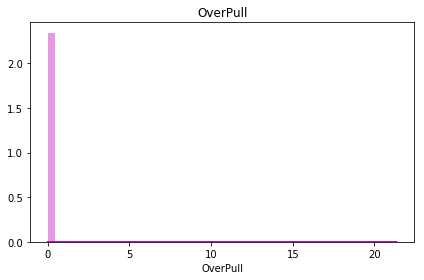

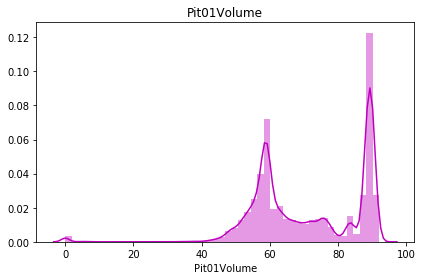

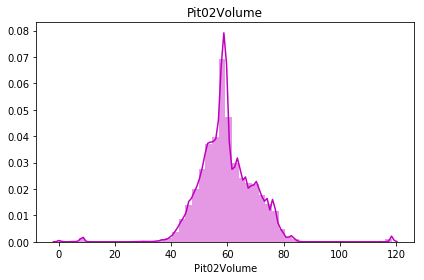

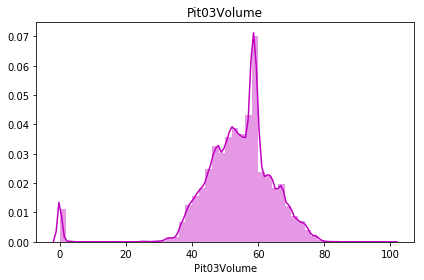

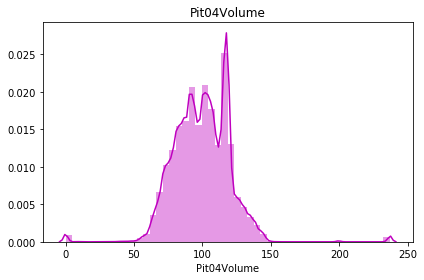

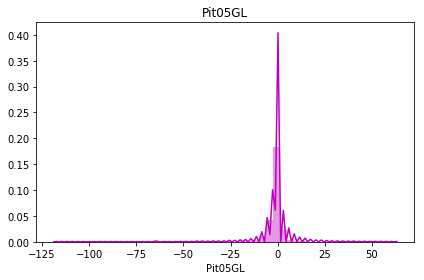

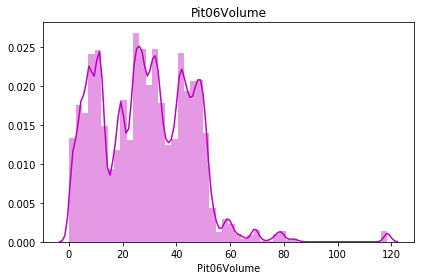

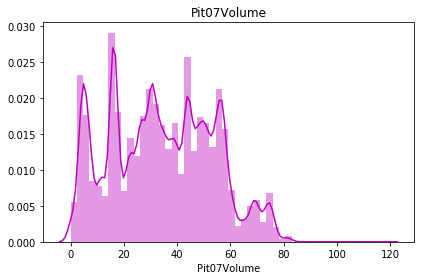

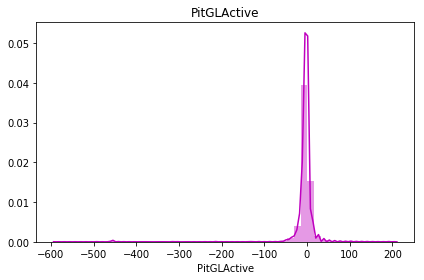

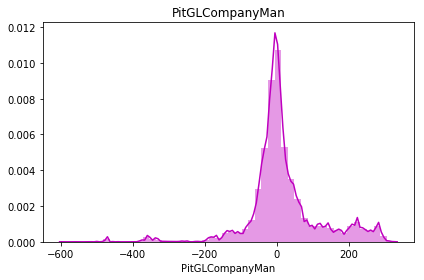

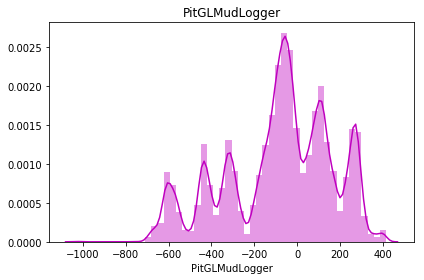

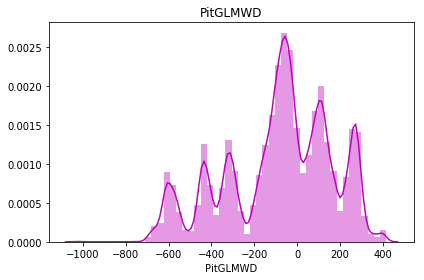

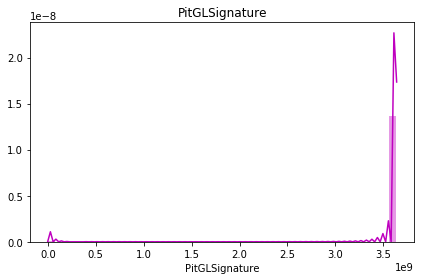

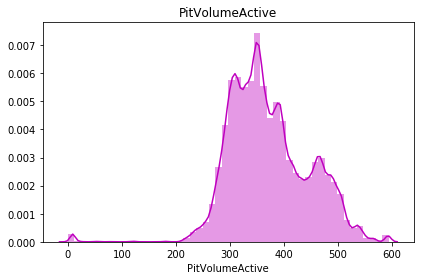

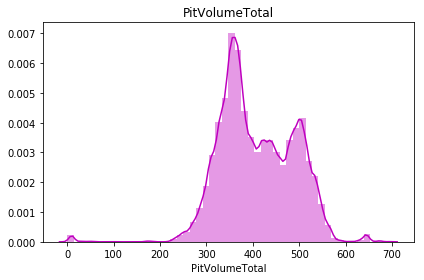

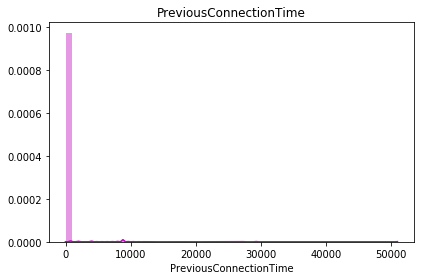

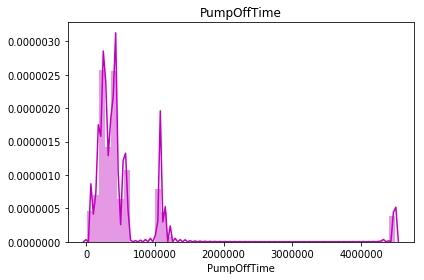

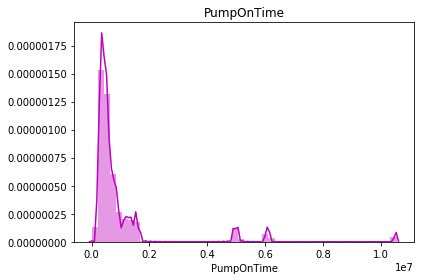

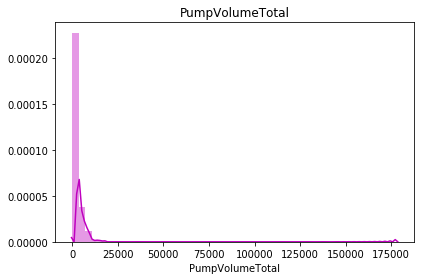

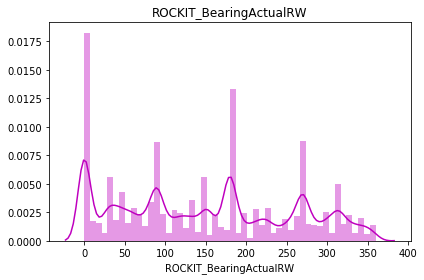

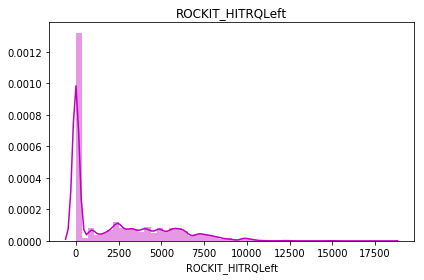

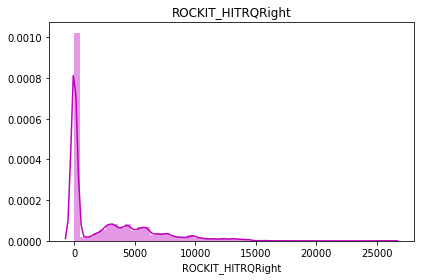

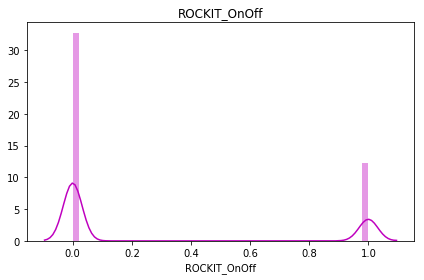

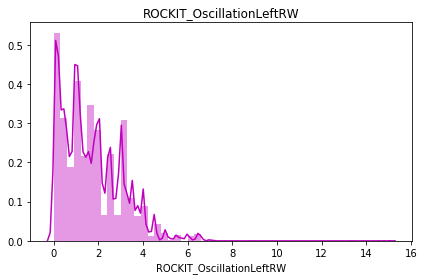

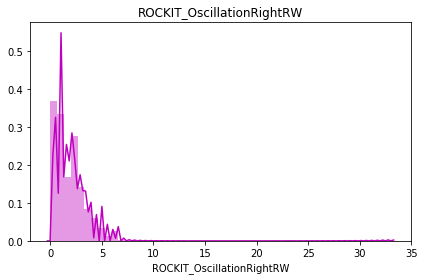

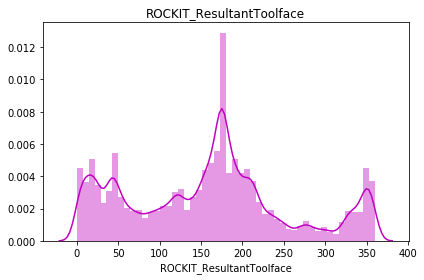

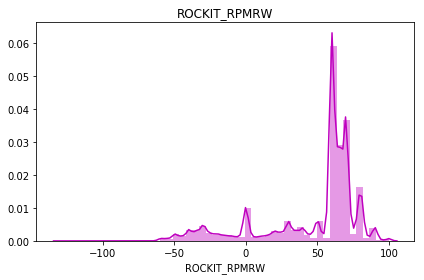

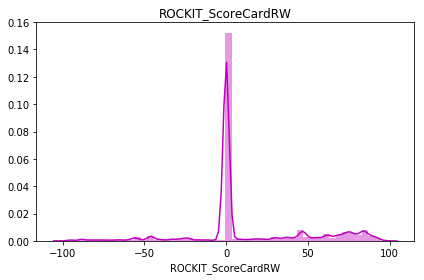

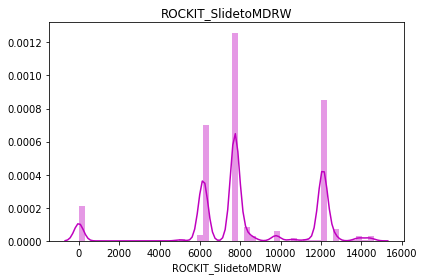

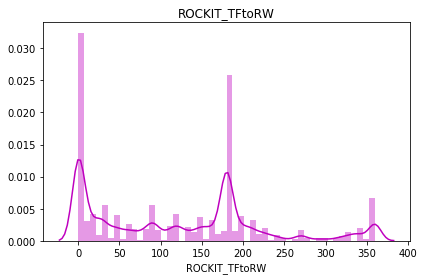

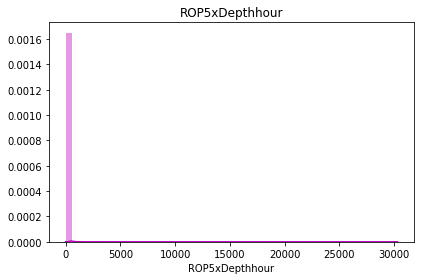

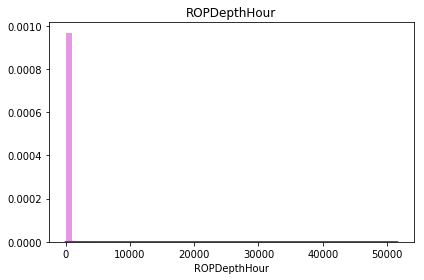

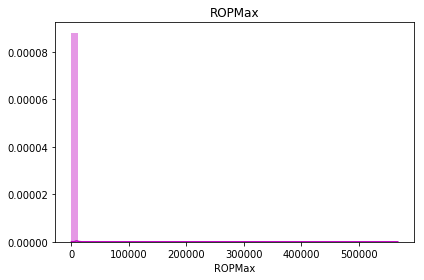

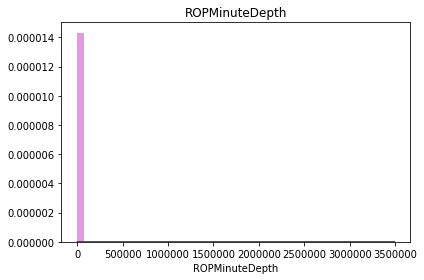

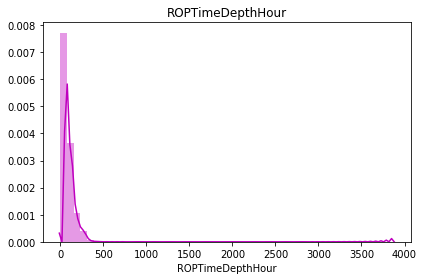

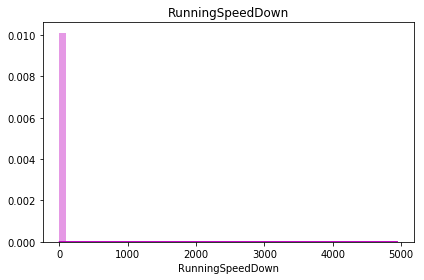

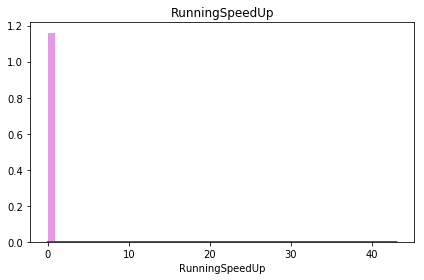

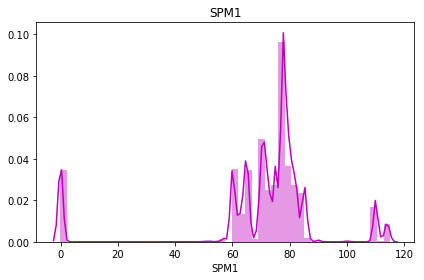

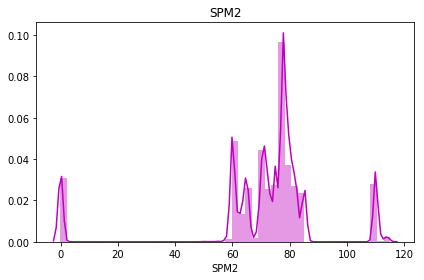

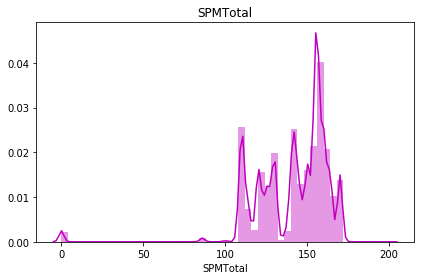

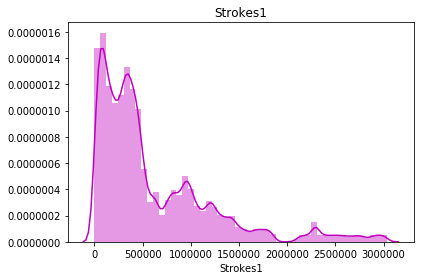

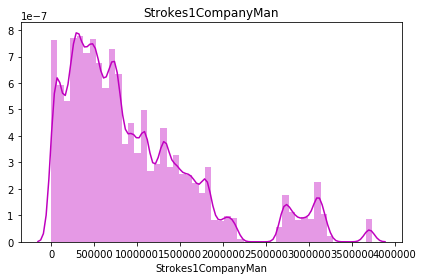

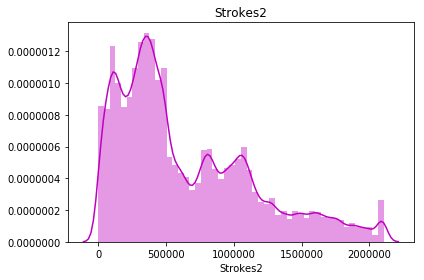

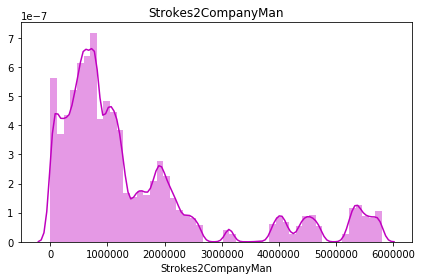

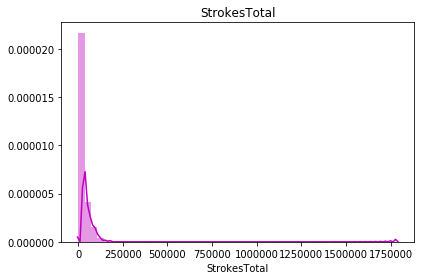

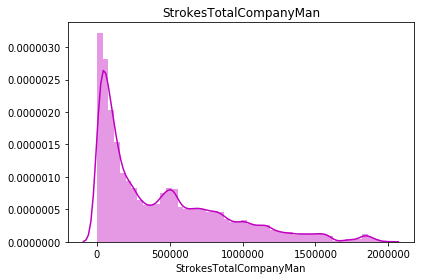

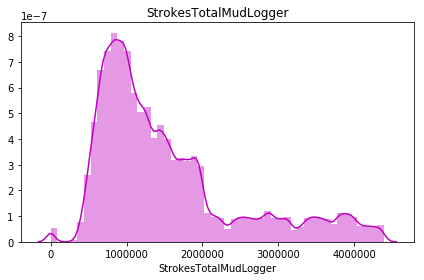

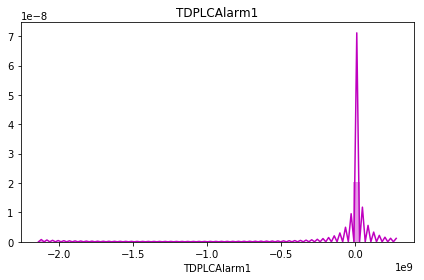

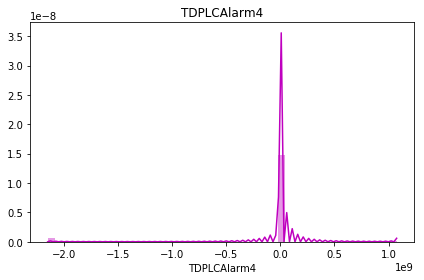

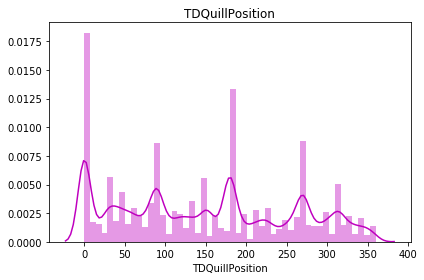

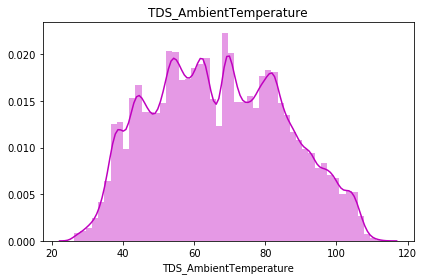

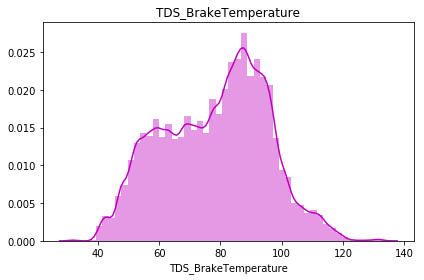

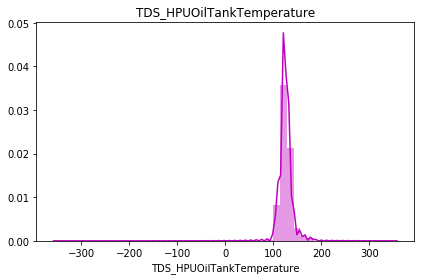

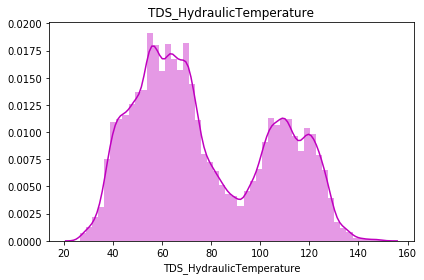

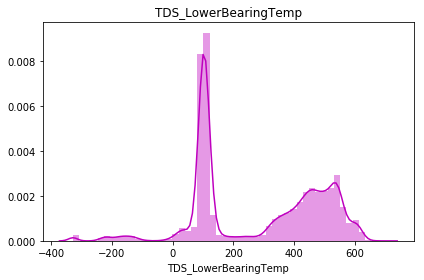

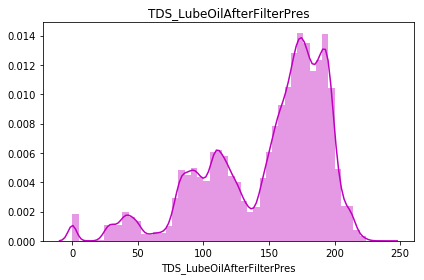

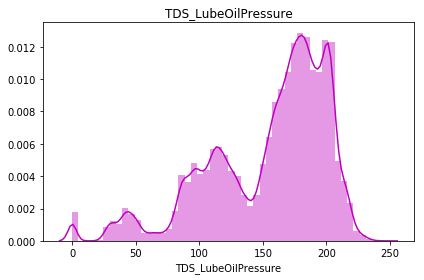

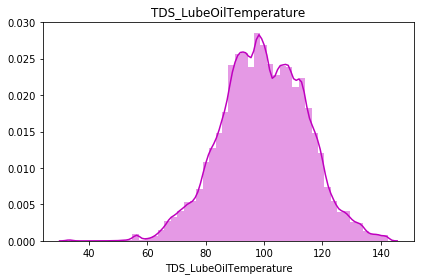

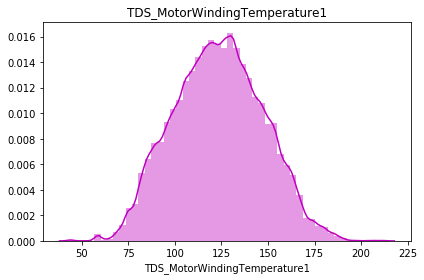

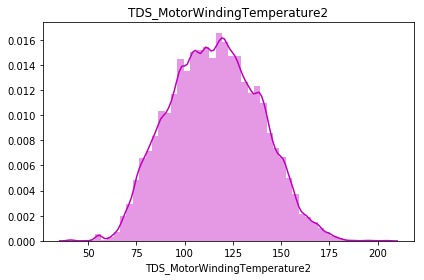

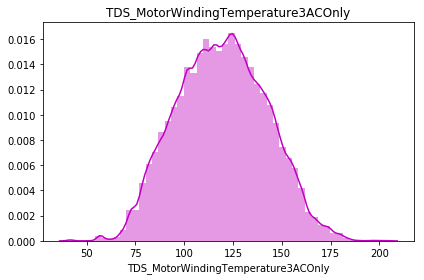

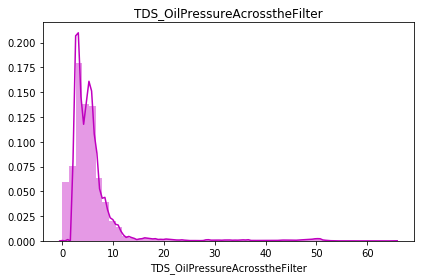

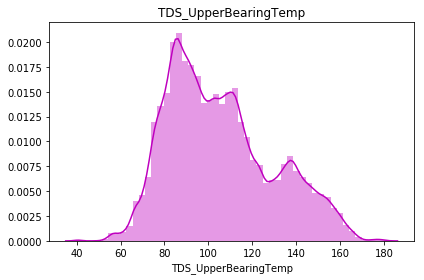

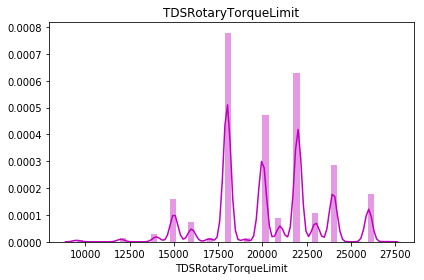

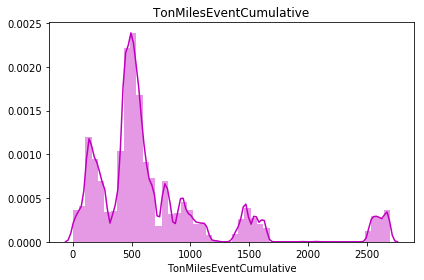

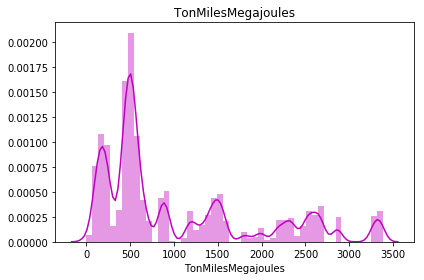

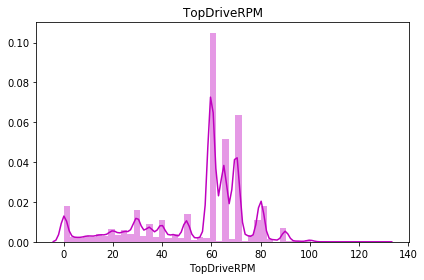

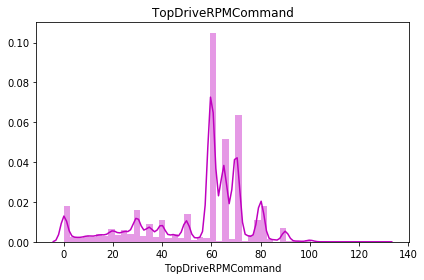

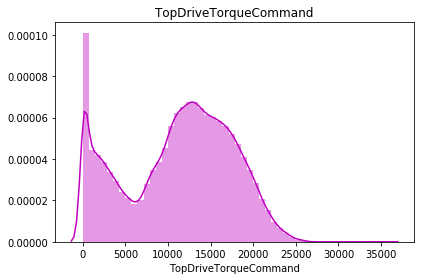

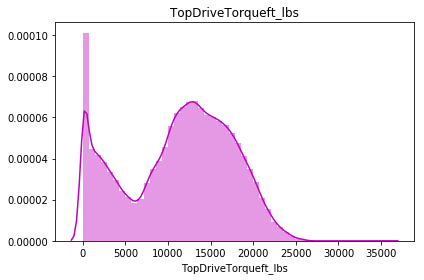

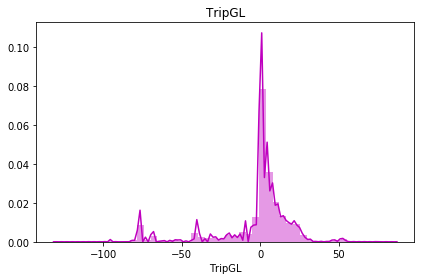

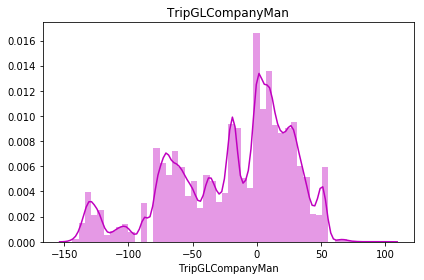

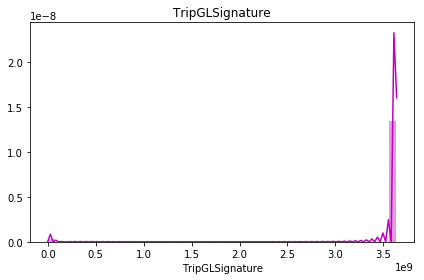

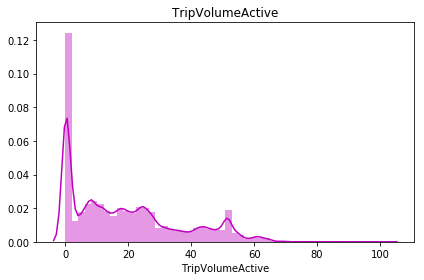

In [13]:
eda.explore_feature_variation(col = columnNames)

<Figure size 432x288 with 0 Axes>

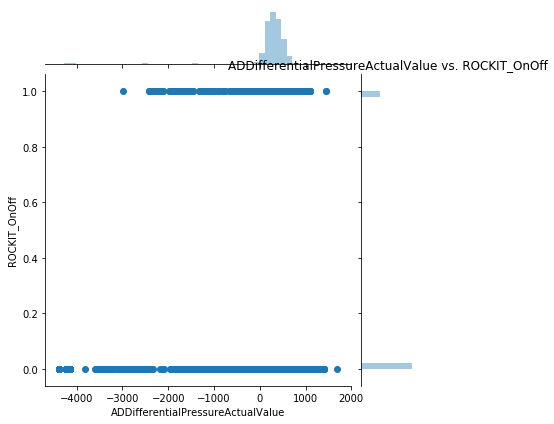

<Figure size 432x288 with 0 Axes>

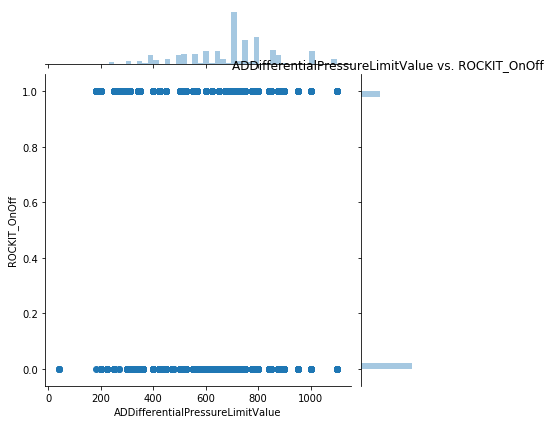

<Figure size 432x288 with 0 Axes>

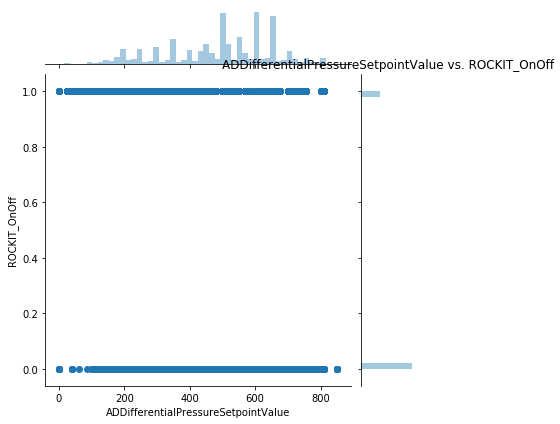

<Figure size 432x288 with 0 Axes>

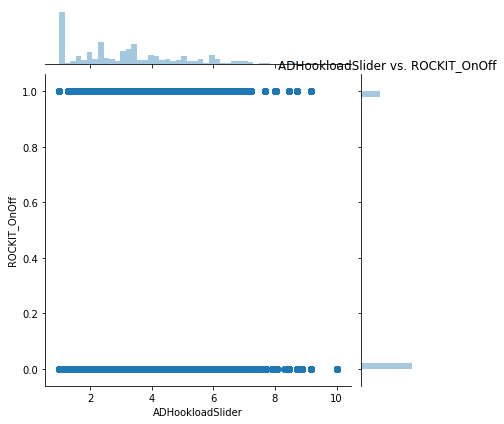

<Figure size 432x288 with 0 Axes>

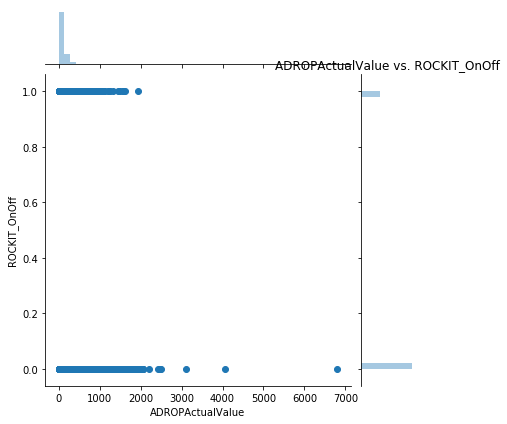

<Figure size 432x288 with 0 Axes>

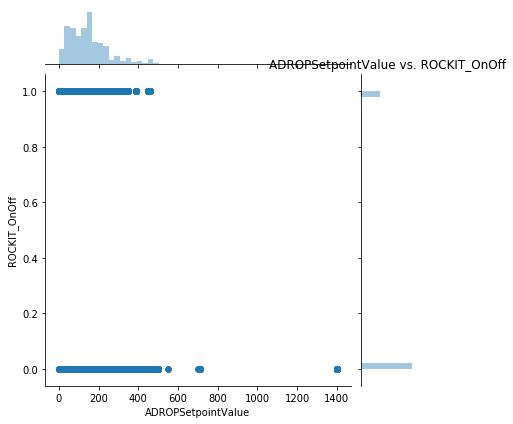

<Figure size 432x288 with 0 Axes>

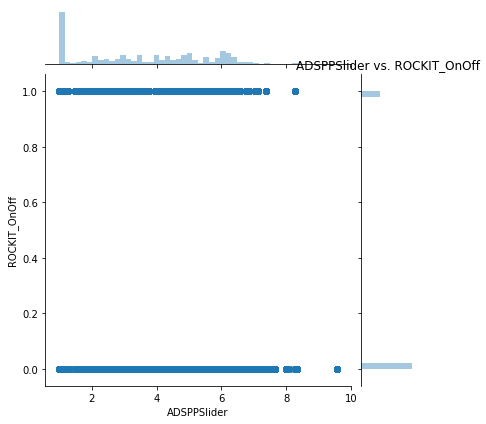

<Figure size 432x288 with 0 Axes>

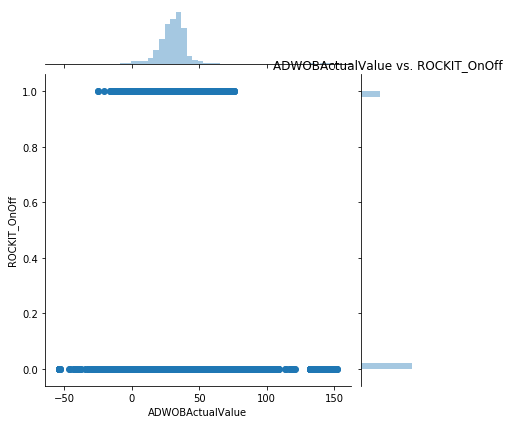

<Figure size 432x288 with 0 Axes>

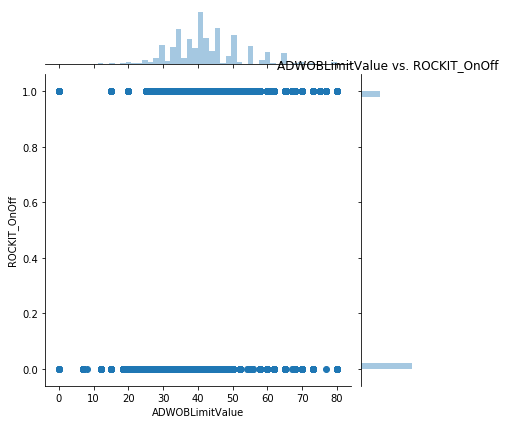

<Figure size 432x288 with 0 Axes>

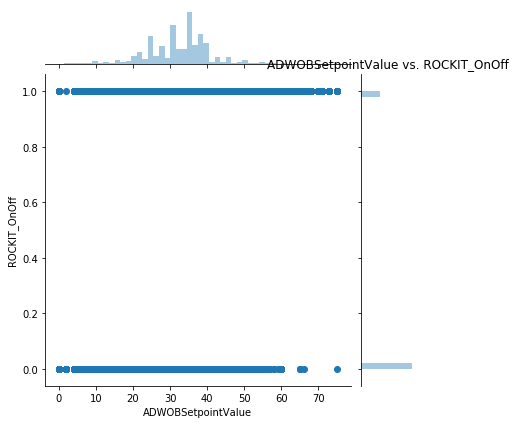

<Figure size 432x288 with 0 Axes>

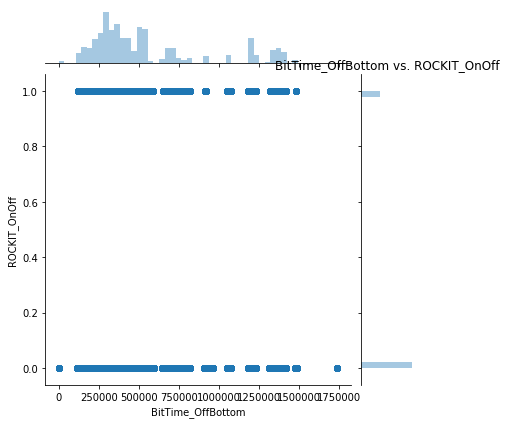

<Figure size 432x288 with 0 Axes>

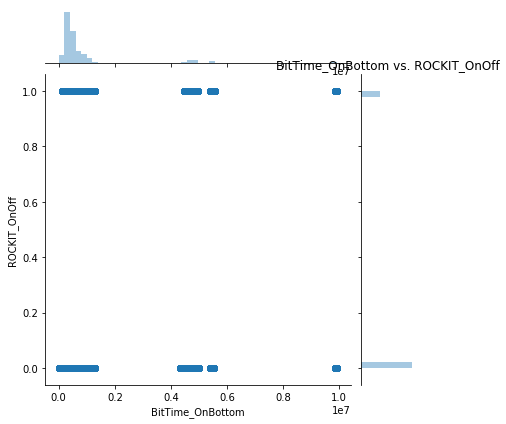

<Figure size 432x288 with 0 Axes>

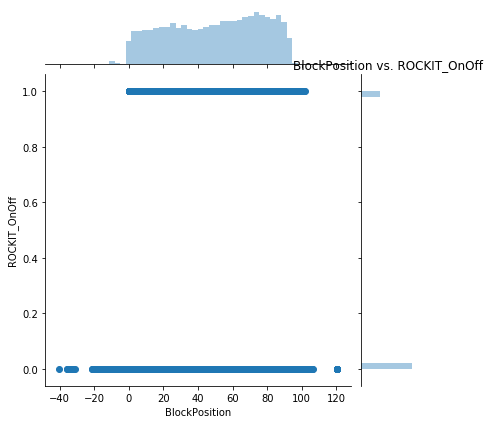

<Figure size 432x288 with 0 Axes>

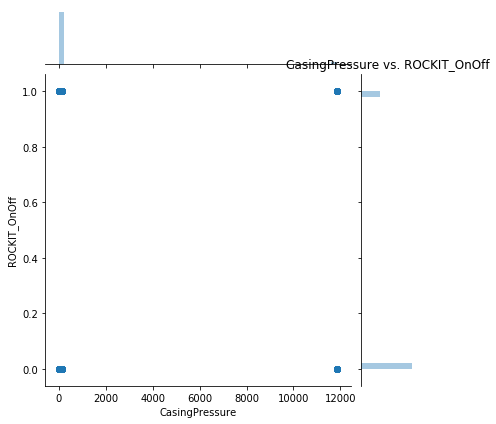

<Figure size 432x288 with 0 Axes>

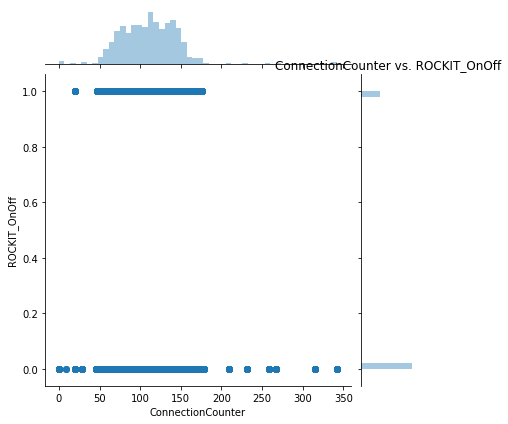

<Figure size 432x288 with 0 Axes>

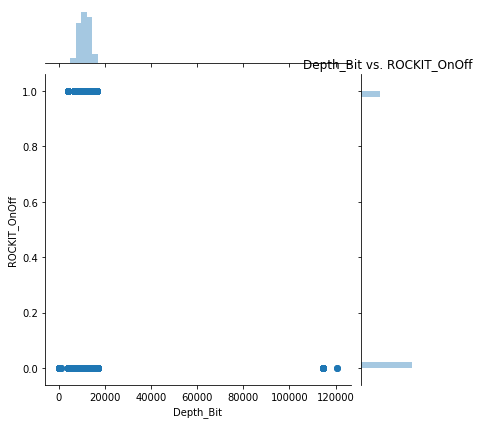

<Figure size 432x288 with 0 Axes>

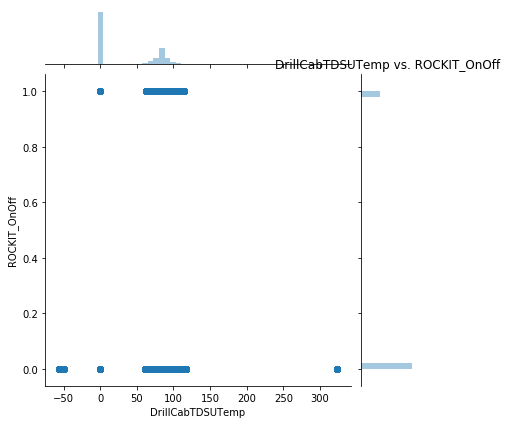

<Figure size 432x288 with 0 Axes>

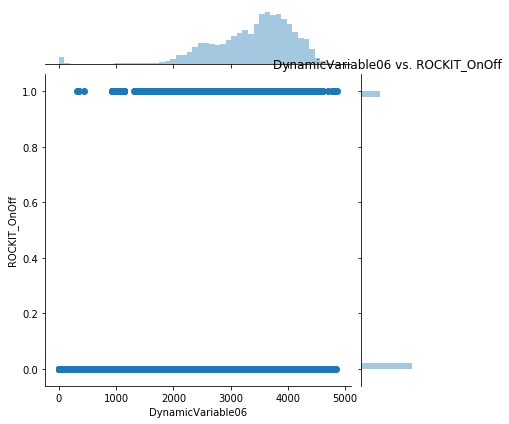

<Figure size 432x288 with 0 Axes>

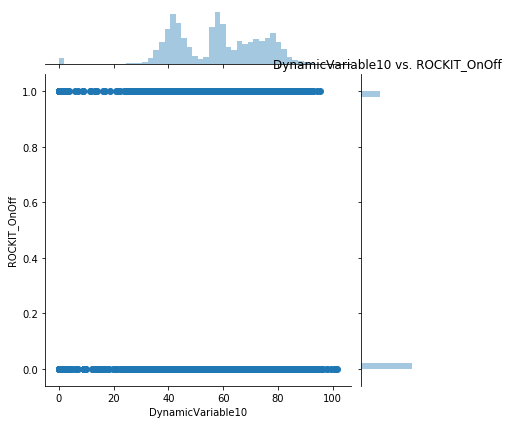

<Figure size 432x288 with 0 Axes>

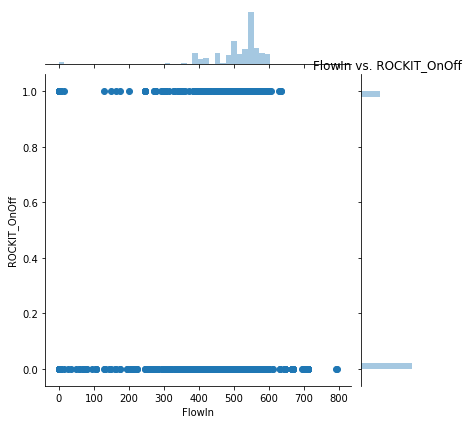

<Figure size 432x288 with 0 Axes>

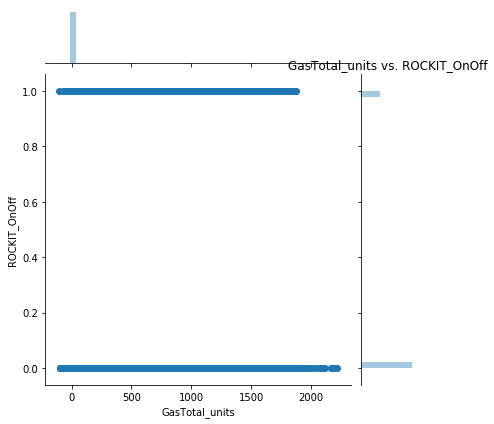

<Figure size 432x288 with 0 Axes>

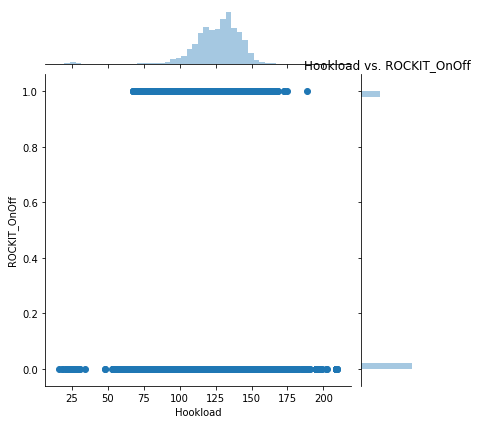

<Figure size 432x288 with 0 Axes>

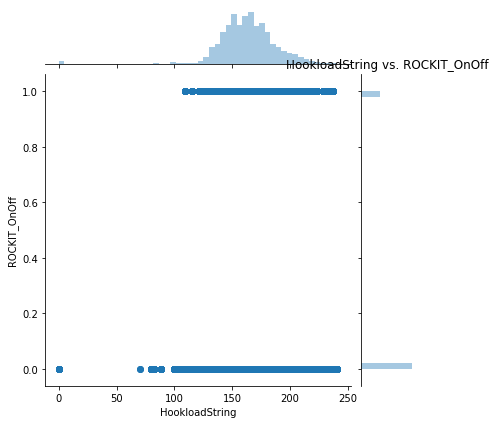

<Figure size 432x288 with 0 Axes>

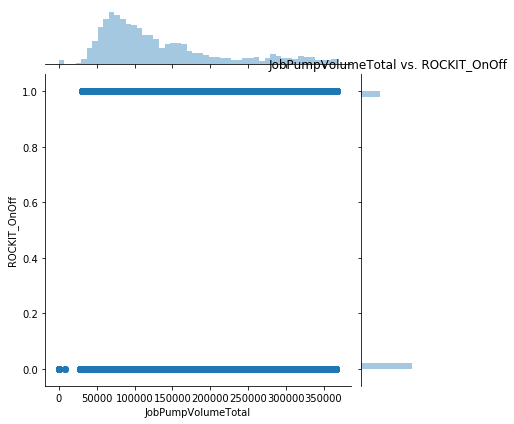

<Figure size 432x288 with 0 Axes>

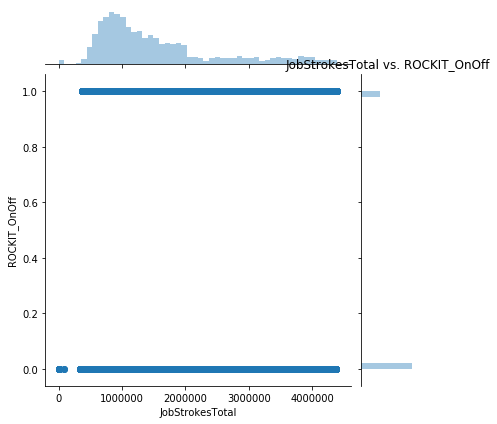

<Figure size 432x288 with 0 Axes>

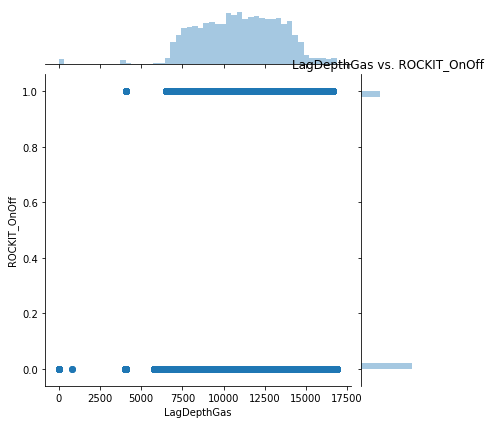

<Figure size 432x288 with 0 Axes>

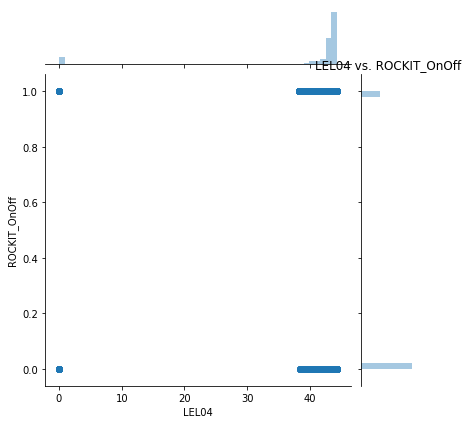

<Figure size 432x288 with 0 Axes>

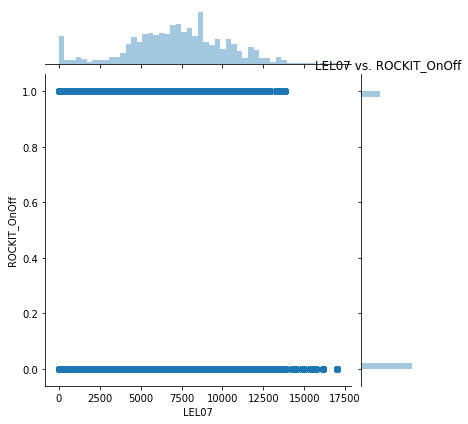

<Figure size 432x288 with 0 Axes>

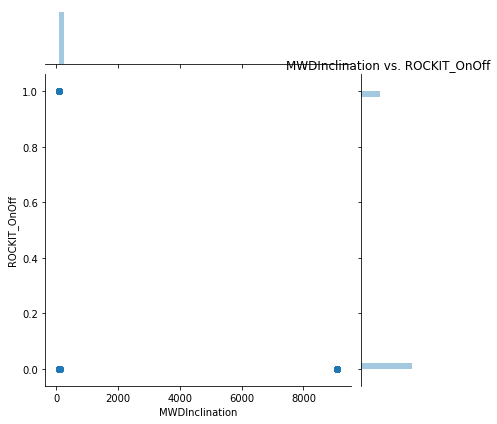

<Figure size 432x288 with 0 Axes>

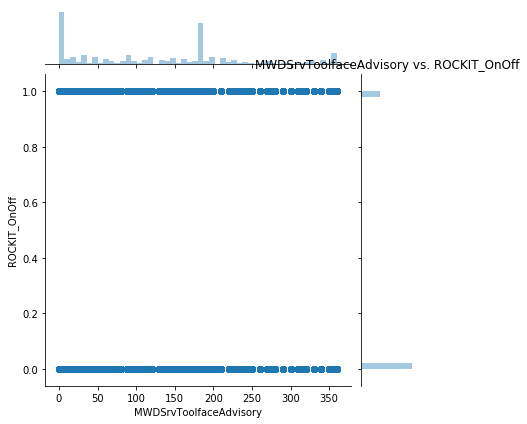

<Figure size 432x288 with 0 Axes>

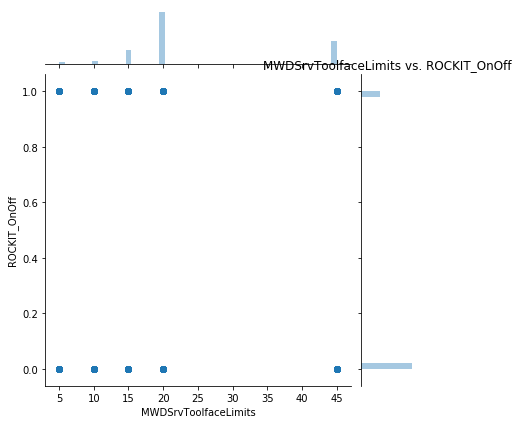

<Figure size 432x288 with 0 Axes>

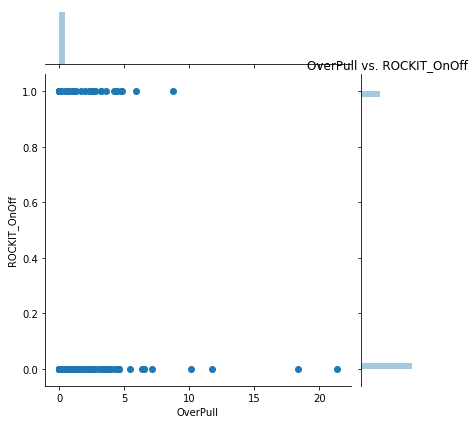

<Figure size 432x288 with 0 Axes>

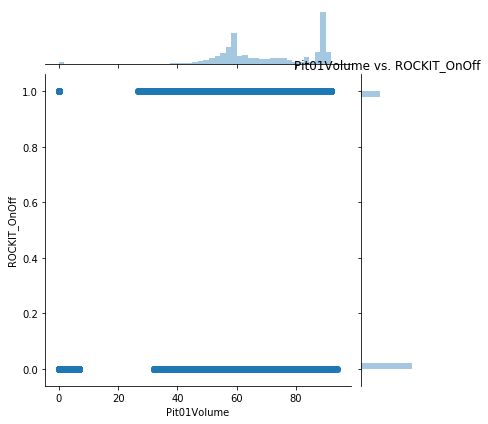

<Figure size 432x288 with 0 Axes>

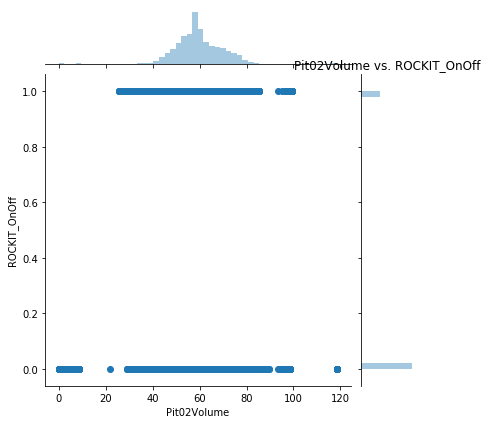

<Figure size 432x288 with 0 Axes>

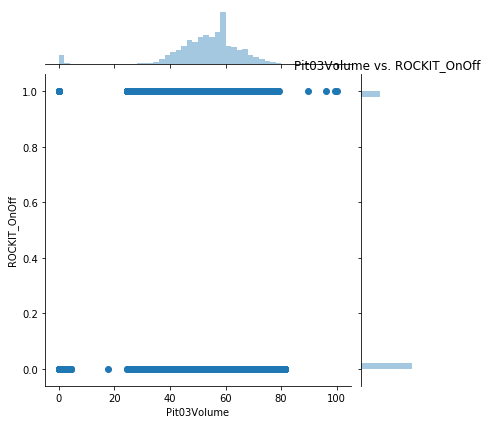

<Figure size 432x288 with 0 Axes>

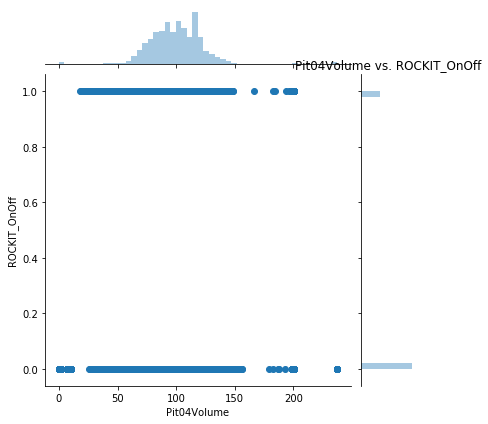

<Figure size 432x288 with 0 Axes>

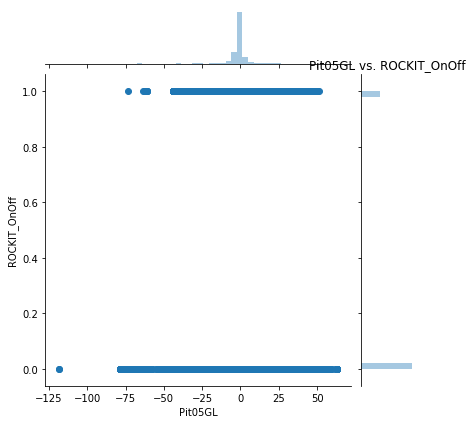

<Figure size 432x288 with 0 Axes>

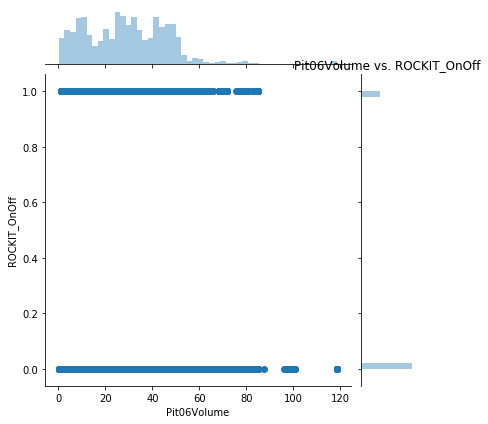

<Figure size 432x288 with 0 Axes>

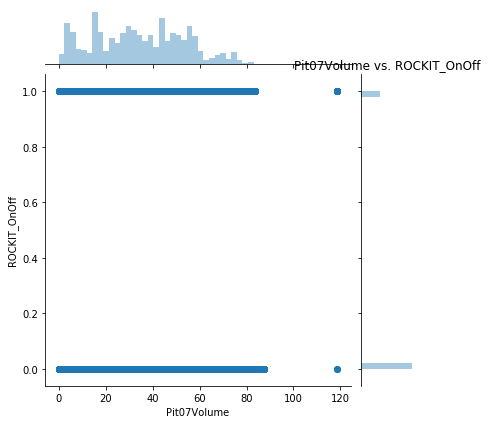

<Figure size 432x288 with 0 Axes>

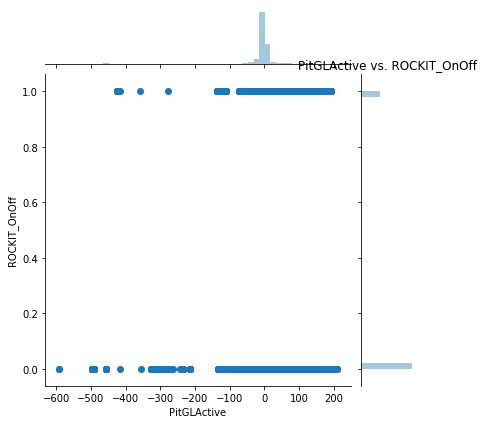

<Figure size 432x288 with 0 Axes>

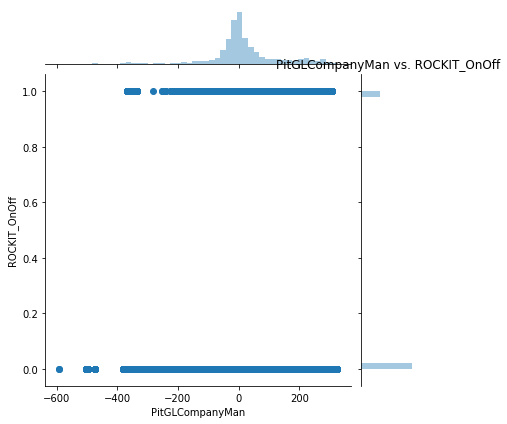

<Figure size 432x288 with 0 Axes>

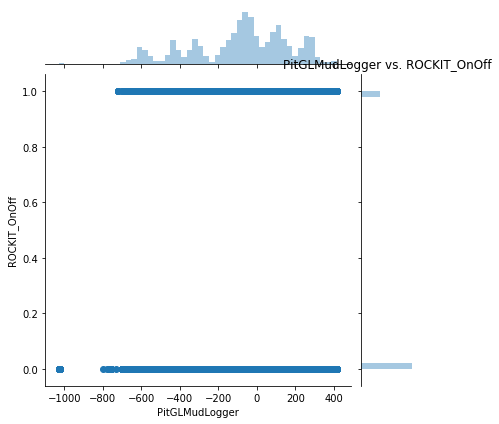

<Figure size 432x288 with 0 Axes>

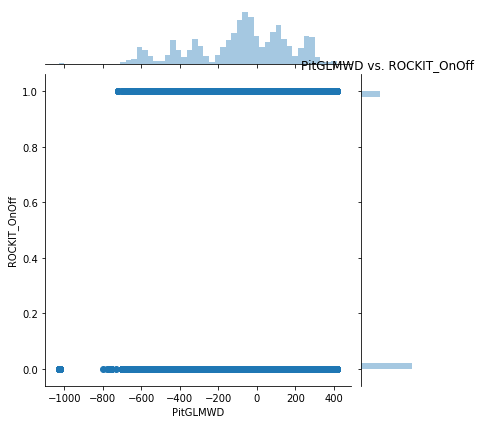

<Figure size 432x288 with 0 Axes>

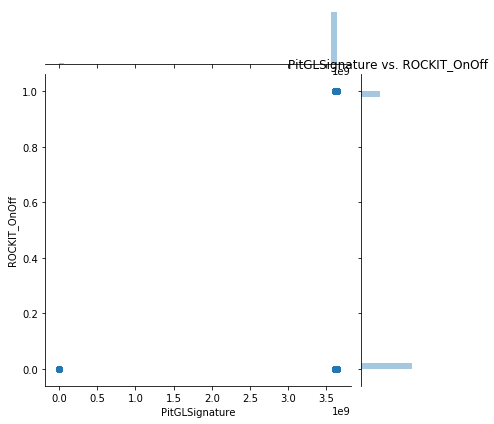

<Figure size 432x288 with 0 Axes>

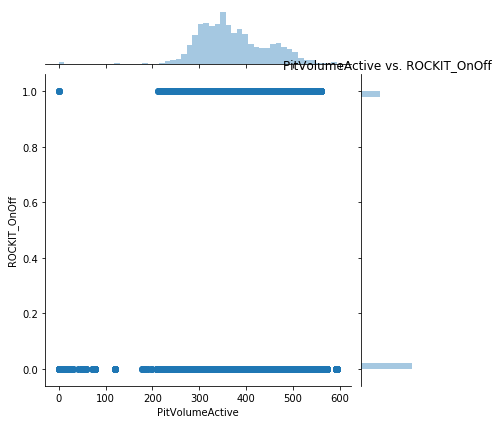

<Figure size 432x288 with 0 Axes>

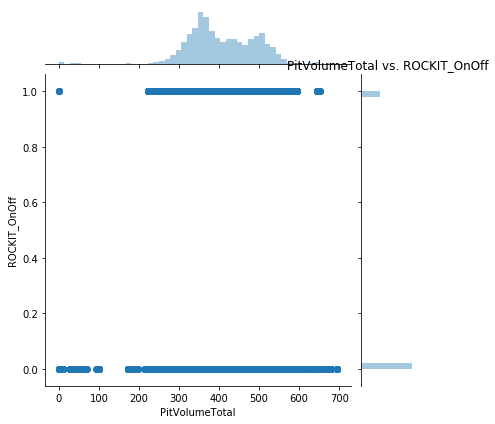

<Figure size 432x288 with 0 Axes>

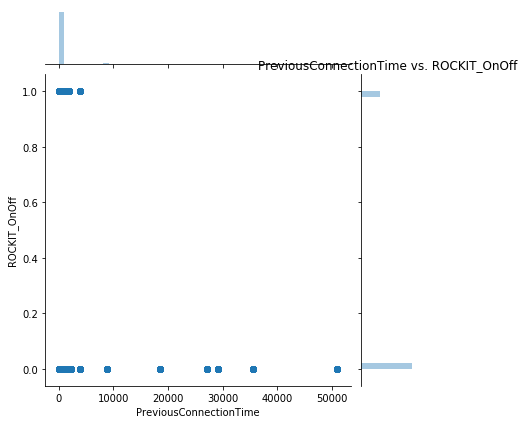

<Figure size 432x288 with 0 Axes>

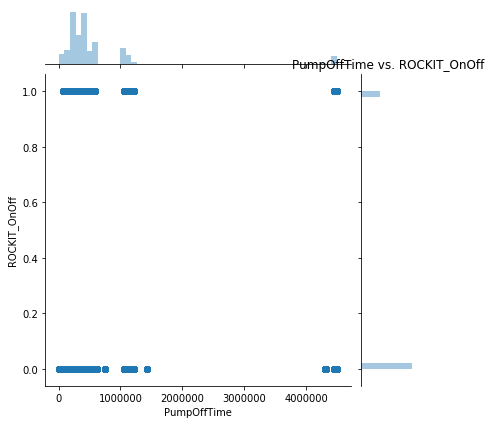

<Figure size 432x288 with 0 Axes>

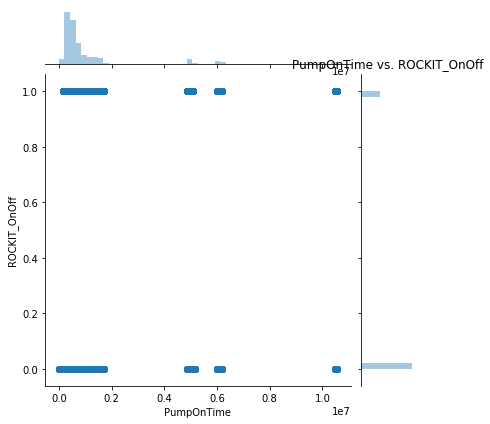

<Figure size 432x288 with 0 Axes>

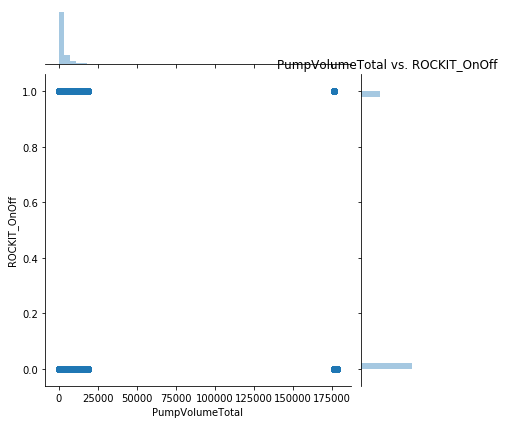

<Figure size 432x288 with 0 Axes>

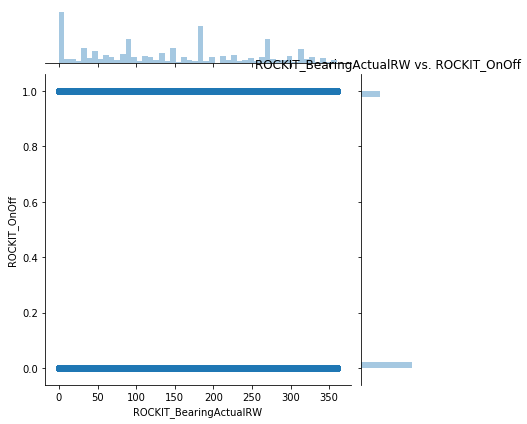

<Figure size 432x288 with 0 Axes>

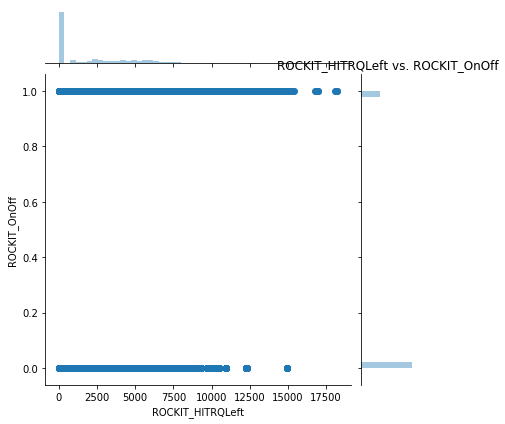

<Figure size 432x288 with 0 Axes>

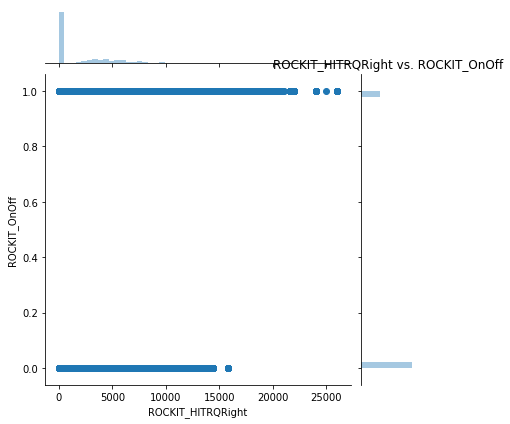

<Figure size 432x288 with 0 Axes>

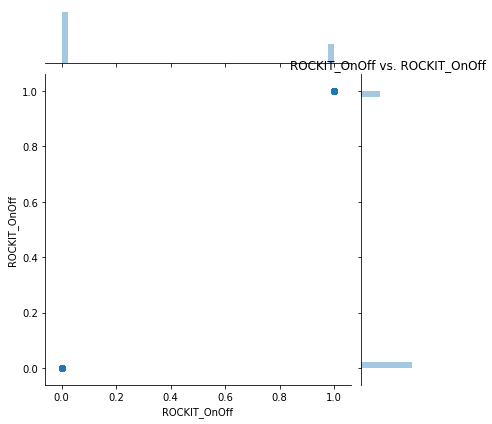

<Figure size 432x288 with 0 Axes>

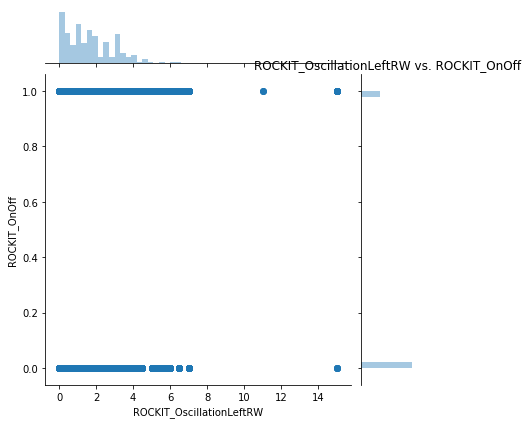

<Figure size 432x288 with 0 Axes>

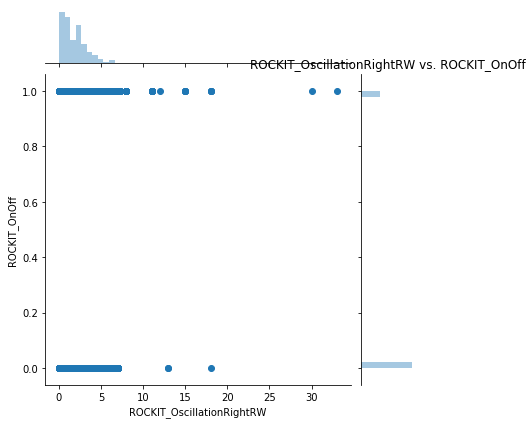

<Figure size 432x288 with 0 Axes>

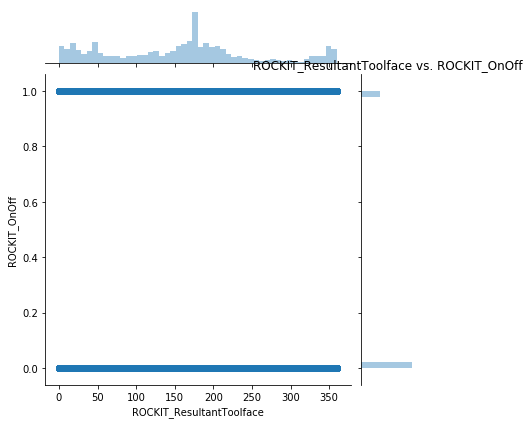

<Figure size 432x288 with 0 Axes>

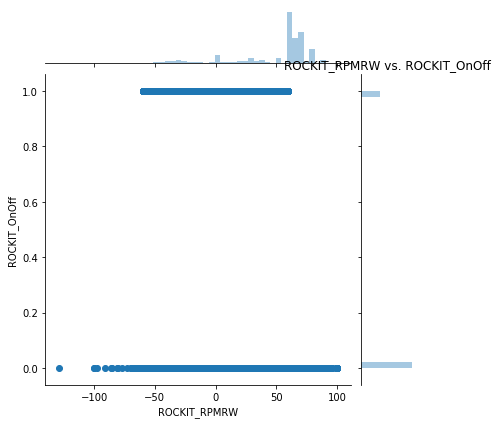

<Figure size 432x288 with 0 Axes>

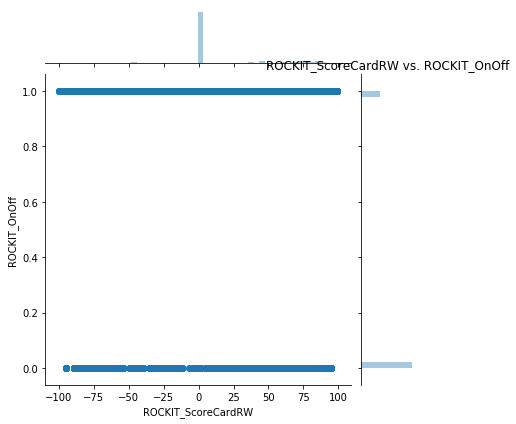

<Figure size 432x288 with 0 Axes>

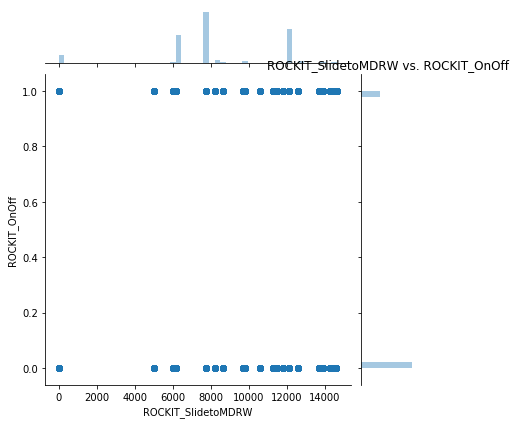

<Figure size 432x288 with 0 Axes>

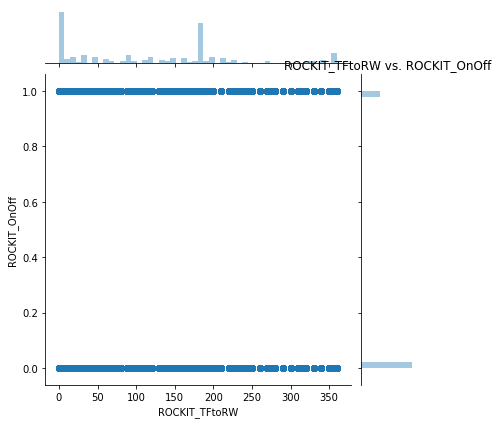

<Figure size 432x288 with 0 Axes>

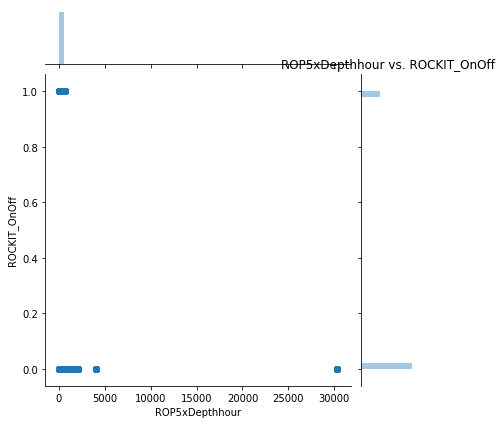

<Figure size 432x288 with 0 Axes>

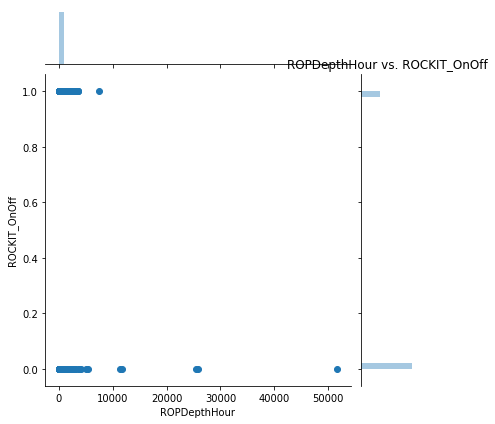

<Figure size 432x288 with 0 Axes>

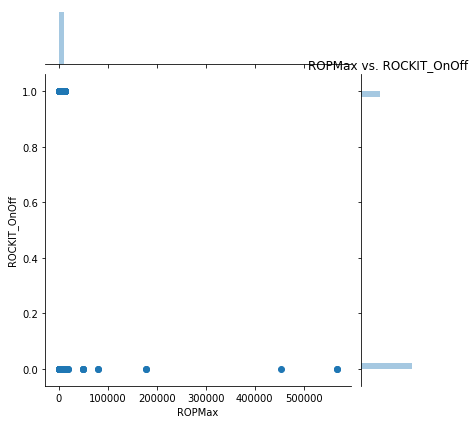

<Figure size 432x288 with 0 Axes>

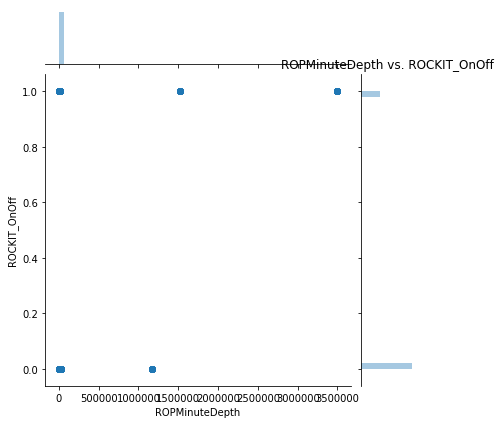

<Figure size 432x288 with 0 Axes>

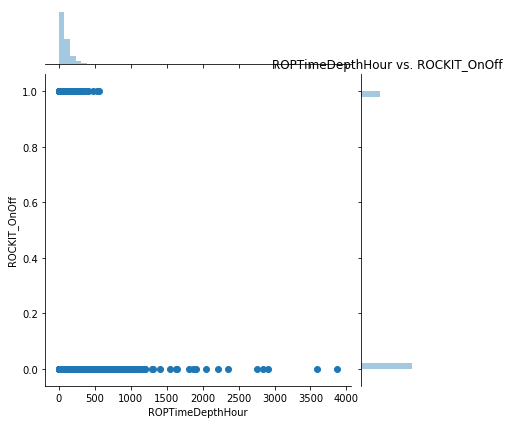

<Figure size 432x288 with 0 Axes>

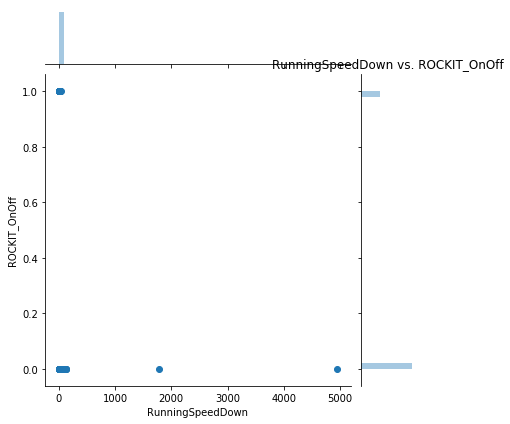

<Figure size 432x288 with 0 Axes>

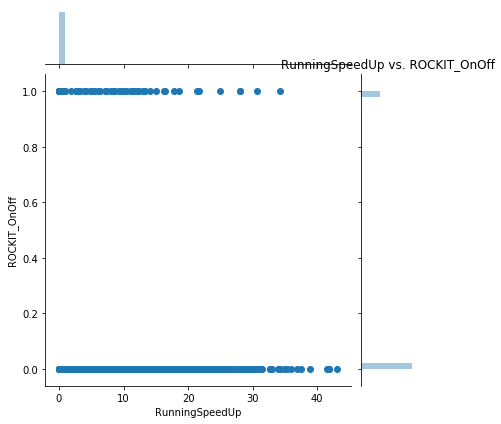

<Figure size 432x288 with 0 Axes>

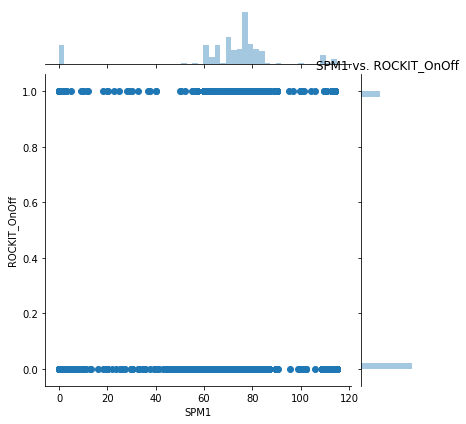

<Figure size 432x288 with 0 Axes>

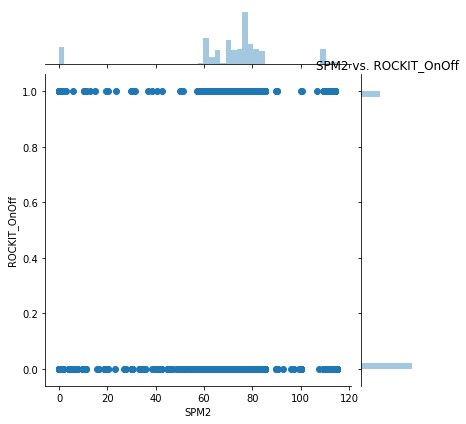

<Figure size 432x288 with 0 Axes>

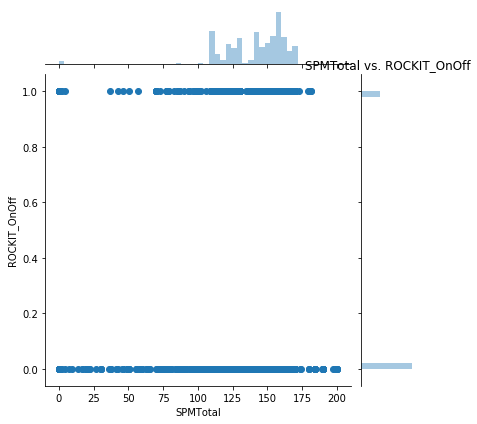

<Figure size 432x288 with 0 Axes>

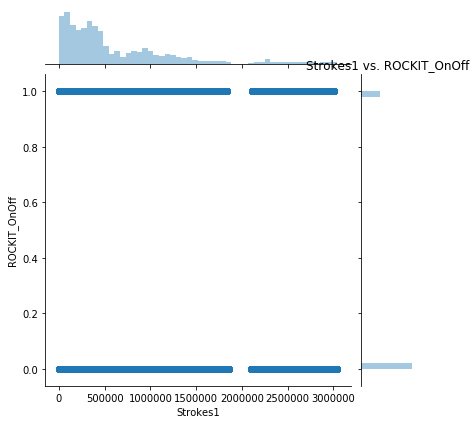

<Figure size 432x288 with 0 Axes>

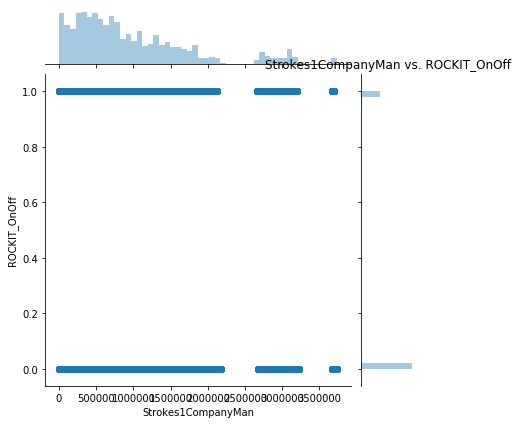

<Figure size 432x288 with 0 Axes>

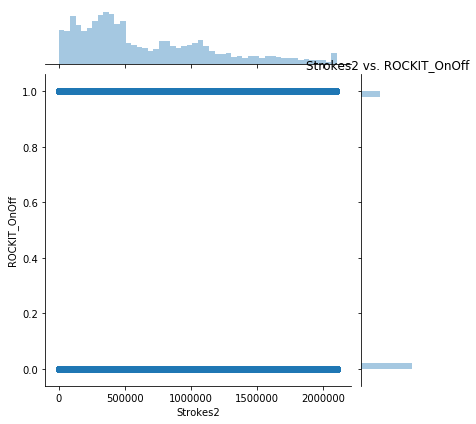

<Figure size 432x288 with 0 Axes>

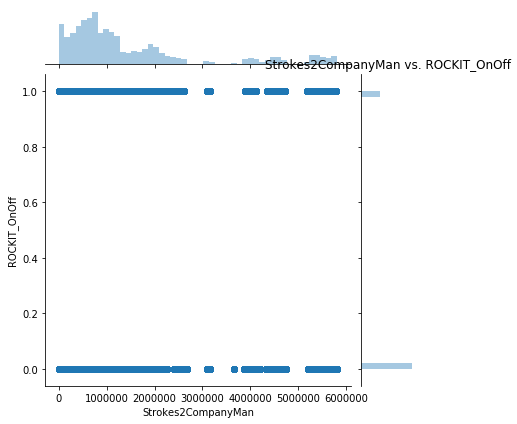

<Figure size 432x288 with 0 Axes>

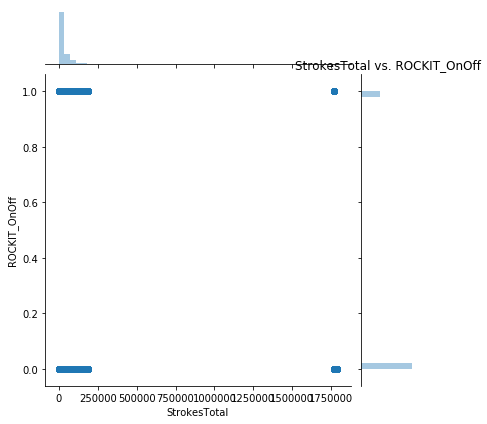

<Figure size 432x288 with 0 Axes>

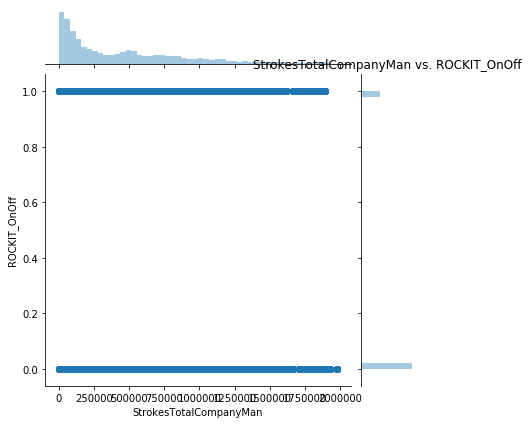

<Figure size 432x288 with 0 Axes>

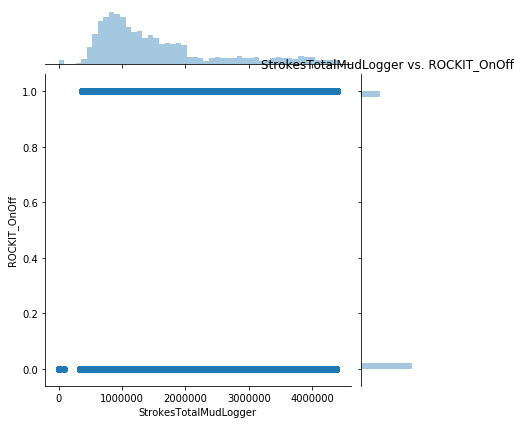

<Figure size 432x288 with 0 Axes>

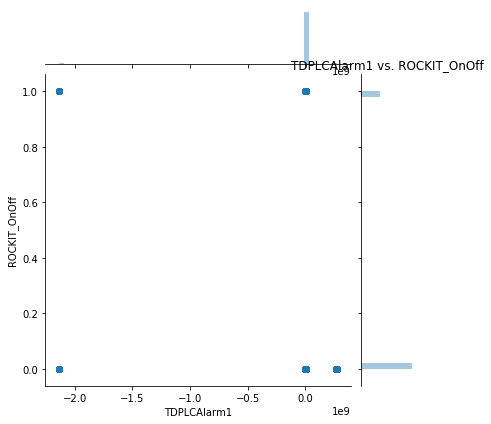

<Figure size 432x288 with 0 Axes>

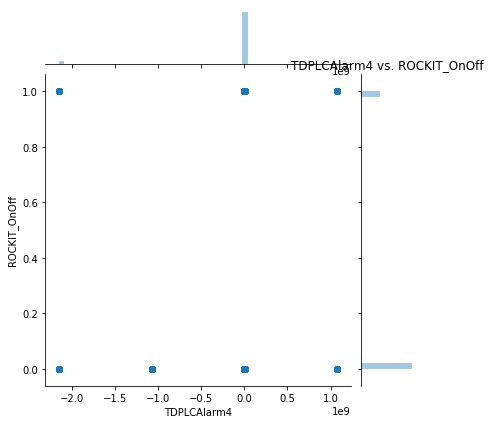

<Figure size 432x288 with 0 Axes>

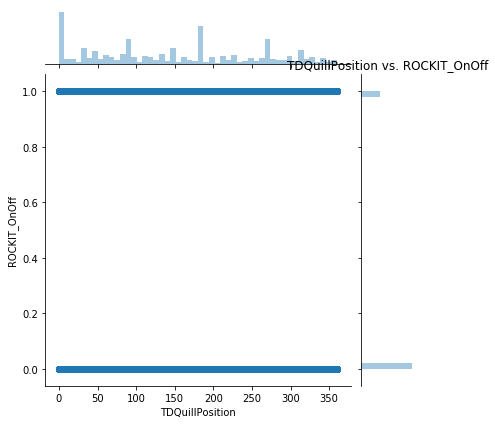

<Figure size 432x288 with 0 Axes>

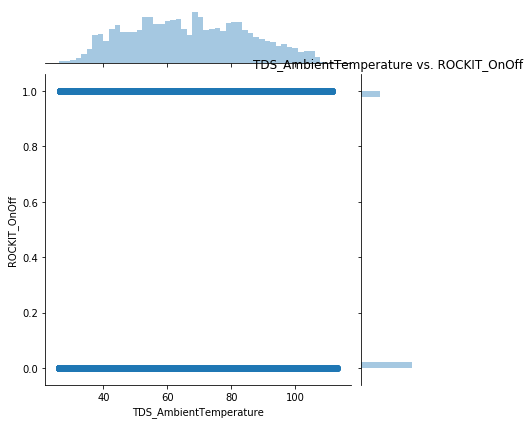

<Figure size 432x288 with 0 Axes>

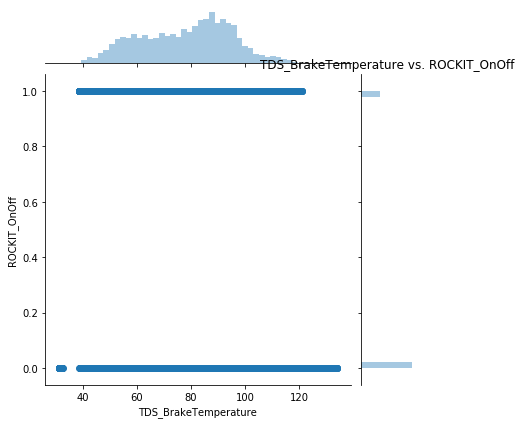

<Figure size 432x288 with 0 Axes>

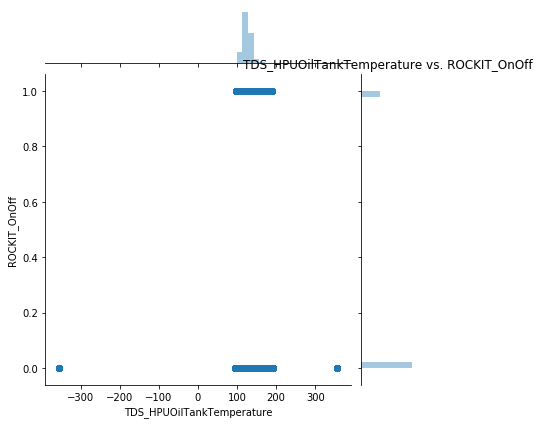

<Figure size 432x288 with 0 Axes>

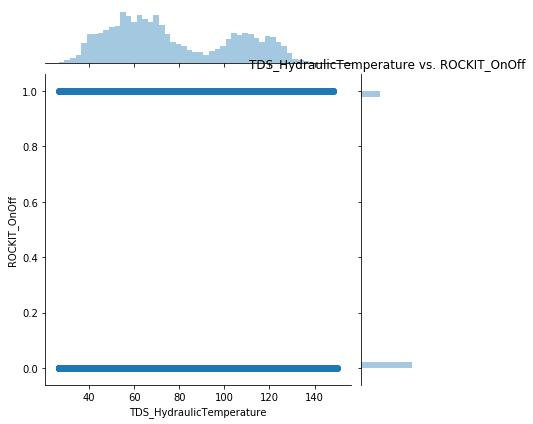

<Figure size 432x288 with 0 Axes>

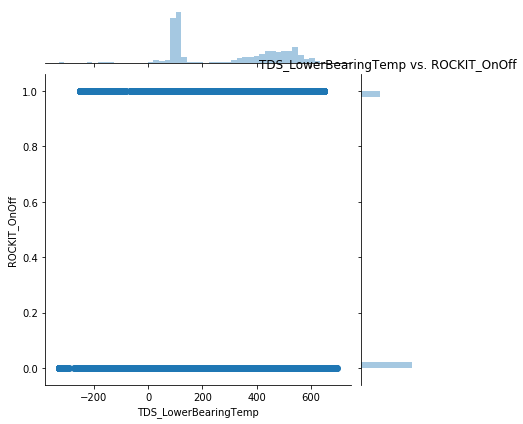

<Figure size 432x288 with 0 Axes>

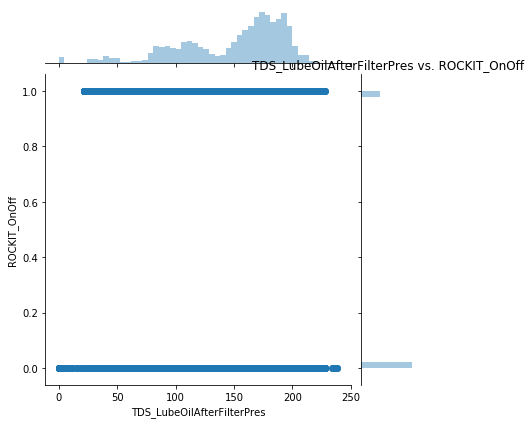

<Figure size 432x288 with 0 Axes>

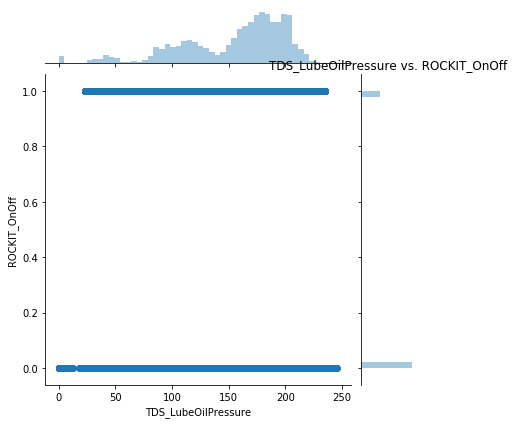

<Figure size 432x288 with 0 Axes>

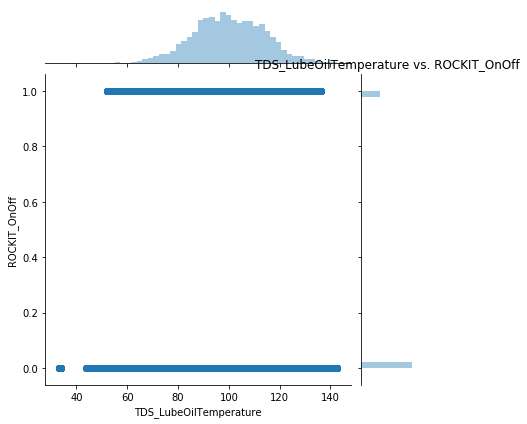

<Figure size 432x288 with 0 Axes>

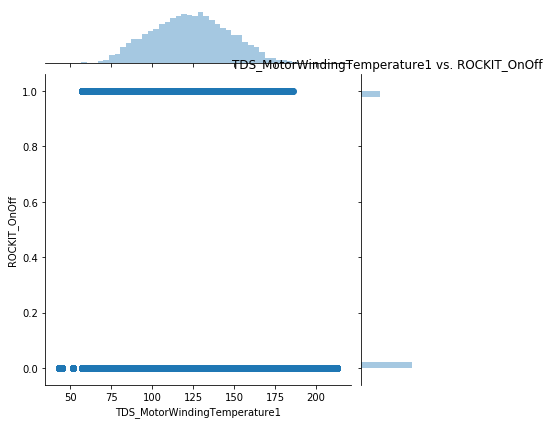

<Figure size 432x288 with 0 Axes>

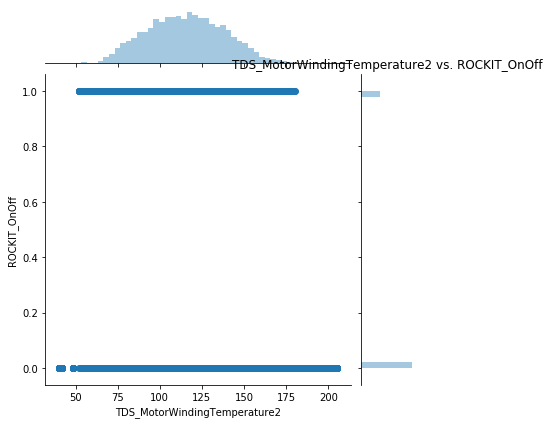

<Figure size 432x288 with 0 Axes>

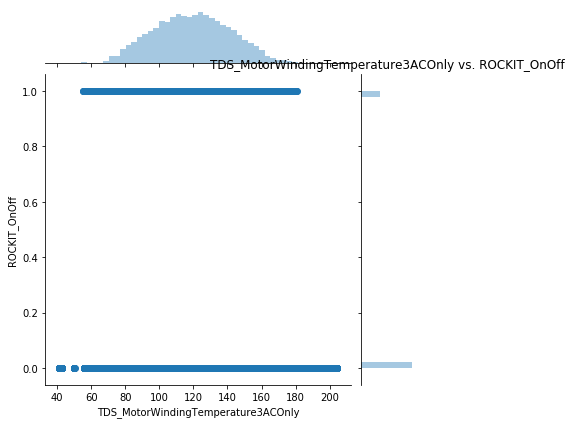

<Figure size 432x288 with 0 Axes>

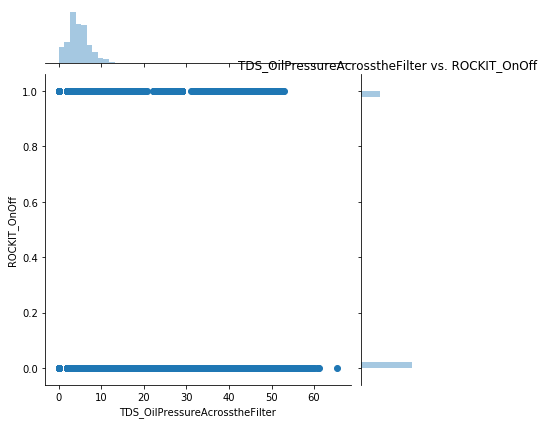

<Figure size 432x288 with 0 Axes>

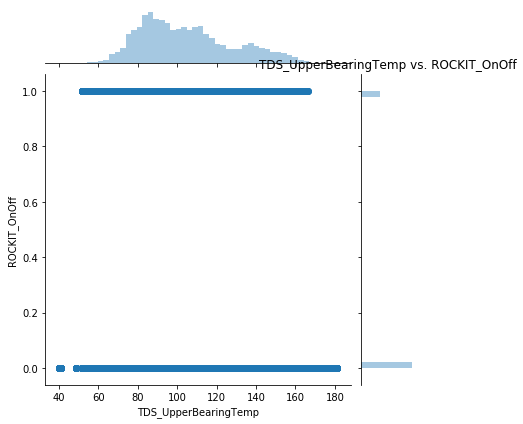

<Figure size 432x288 with 0 Axes>

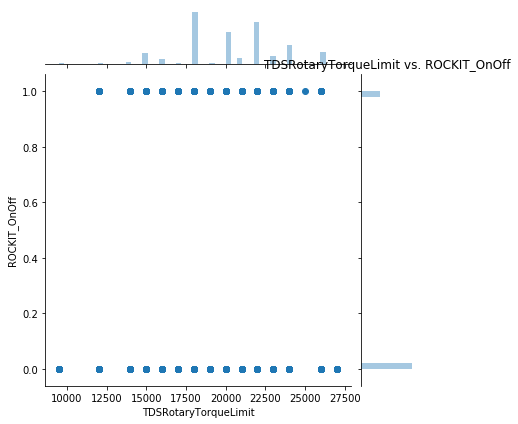

<Figure size 432x288 with 0 Axes>

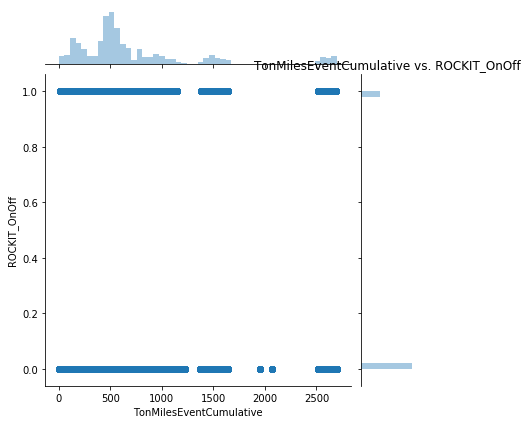

<Figure size 432x288 with 0 Axes>

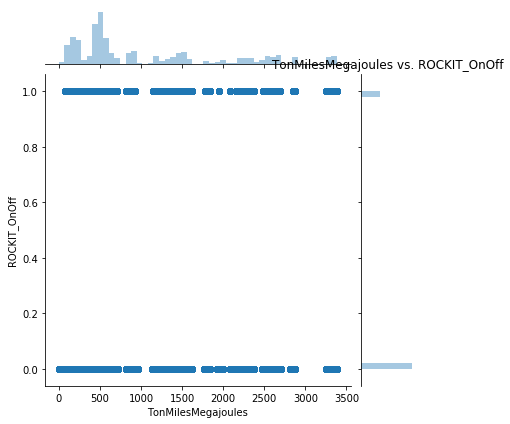

<Figure size 432x288 with 0 Axes>

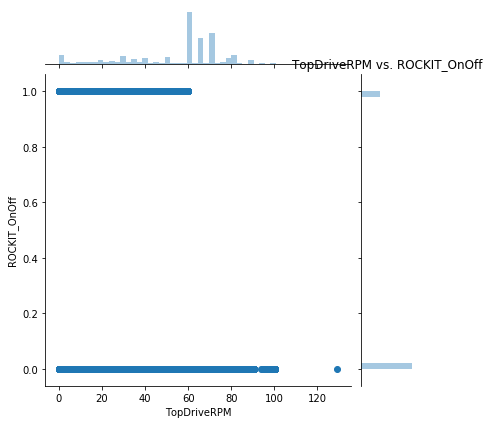

<Figure size 432x288 with 0 Axes>

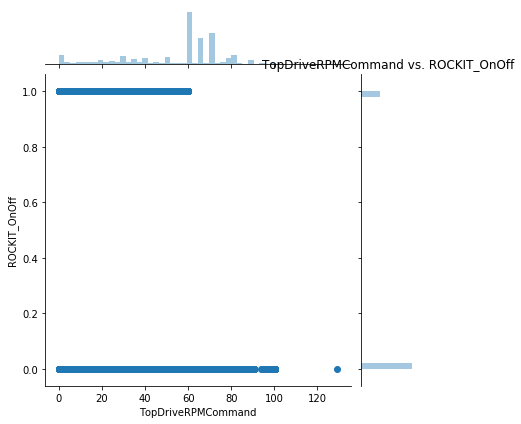

<Figure size 432x288 with 0 Axes>

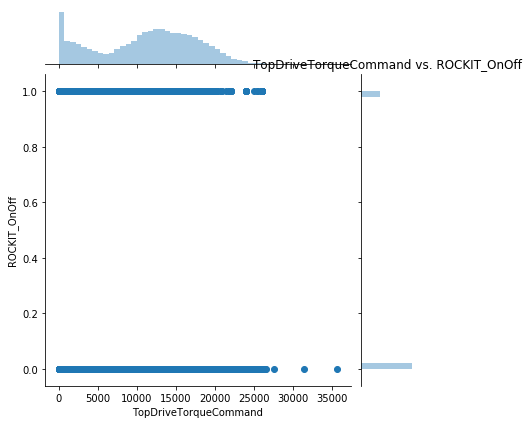

<Figure size 432x288 with 0 Axes>

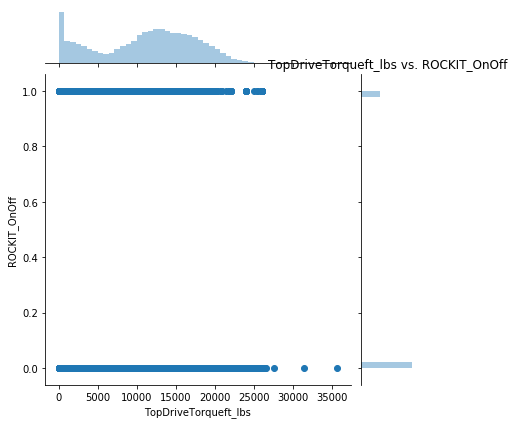

<Figure size 432x288 with 0 Axes>

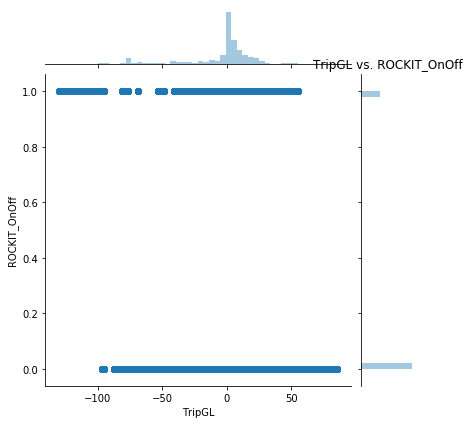

<Figure size 432x288 with 0 Axes>

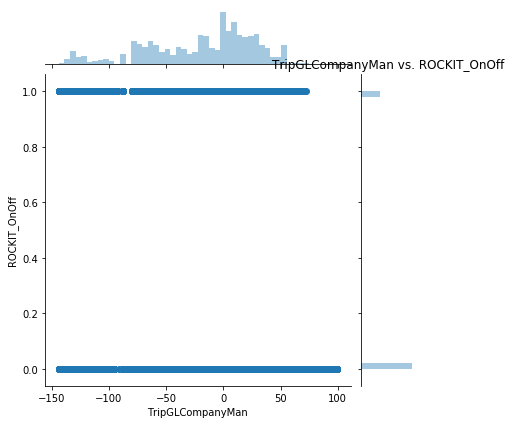

<Figure size 432x288 with 0 Axes>

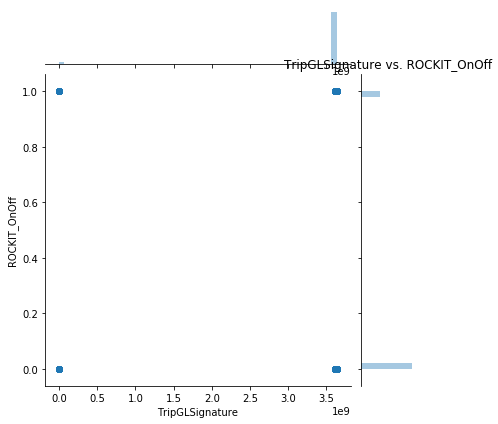

<Figure size 432x288 with 0 Axes>

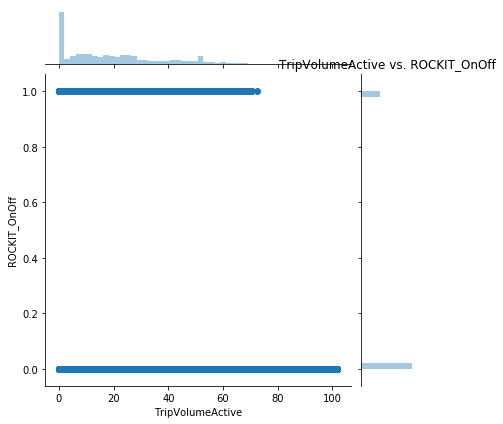

In [89]:
eda.explore_feature_variation(col = columnNames, use_target=True)

# Down Sample the Data Set

In [14]:
# Down sample every minute
df_time_indexed_DS_1 = df_time_indexed.resample('1T').first().dropna()

In [15]:
df_time_indexed_DS_1.shape

(118050, 121)

In [16]:
#see the dimensions of the data
print("Labels Row Count:",df_time_indexed_DS_1.shape[0])
print("Labels Column Count:",df_time_indexed_DS_1.shape[1])

Labels Row Count: 118050
Labels Column Count: 121


In [17]:
#Show first 5 rows of data
df_time_indexed_DS_1.head(2)

,ADDifferentialPressureActualValue,ADDifferentialPressureLimitValue,ADDifferentialPressureSetpointValue,ADHookloadSlider,ADROPActualValue,ADROPSetpointValue,ADSPPSlider,ADWOBActualValue,ADWOBLimitValue,ADWOBSetpointValue,...,TopDriveRPM,TopDriveRPMCommand,TopDriveTorqueCommand,TopDriveTorqueft_lbs,TorqueDelta,TripGL,TripGLCompanyMan,TripGLSignature,TripVolumeActive,WeightonBit
ReportDateTime,,,,,,,,,,,,,,,,,,,,,
2018-06-13 16:24:00,250.675964,700.0,500.0,2.40294,87.634682,115.0,5.97647,25.40164,30.0,25.0,...,80.014908,80.014908,9398.339844,9398.339844,8979.965820,-40.693001,-20.2908,3.611591e+09,1.03443,25.453461
2018-06-13 16:25:00,240.586945,700.0,500.0,2.40294,84.232651,115.0,5.97647,24.56159,30.0,25.0,...,80.025574,80.025574,9217.603516,9217.603516,9736.386719,-40.693001,-20.2908,3.611591e+09,1.03443,25.551750


# Create Features and Labels

In [18]:
label_column =  'ROCKIT_OnOff'

features = df_time_indexed_DS_1.dropna().drop([label_column], axis=1)
#features = df.dropna().drop([label_column, 'ROCKIT_RPMRW'], axis=1)
labels = df_time_indexed_DS_1.dropna()[label_column]

X = features.values
y = labels.values

#1 = Sliding
#0 = Rotating

# Grid Search Start -- Do not have to run again

In [13]:
#--params = {'max_depth':[5, 10, 15], 'min_samples_split':[2, 4, 8]}

#--clf = DecisionTreeClassifier()

#--grid = GridSearchCV(clf, params, cv=10)

In [14]:
#To run on small sample set
#grid.fit(X[:500], y[:500])

#to run on full data set
#--grid.fit(X, y)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': [5, 10, 15], 'min_samples_split': [2, 4, 8]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [15]:
#--best_dt = grid.best_estimator_
#--best_dt

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=4,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [16]:
#--grid.best_params_

{'max_depth': 5, 'min_samples_split': 4}

#### Grid Search Results: 
Original Results
    * Max Depth = 5
    * Min Samples = 8
    
1 Minute sampling
* Max Depth = 5
* Min Samples = 4
## Grid Search End -- Do not have to run again

In [17]:
#

# Feature Reduction
## Create Labels

In [19]:
label_column =  'ROCKIT_OnOff'

#fill in max depth and min samples with above numbers
dt = DecisionTreeClassifier(max_depth=5, min_samples_split=4)

#After grid search is done you can use the object for descion tree fits
#dt = grid.best_estimator_

In [20]:
dt.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

## Create indices
### Non zero importances

In [21]:
#index feature importance
feature_importances = dt.feature_importances_

#Get non zero indicies to filter with
nz_indices = np.argwhere(feature_importances > 0)
nz_features = features.columns[nz_indices].values.flatten()
nz_importances = feature_importances[nz_indices].flatten()

In [22]:
#Find the most importance features number
#nz_features[ np.argmax(nz_importances) ]
#nz_importances.max()

print("Max non-zero feature name = "+ nz_features[ np.argmax(nz_importances) ])
print("Max non-zero feature value = %s" % nz_importances.max())

Max non-zero feature name = ROCKIT_RPMRW
Max non-zero feature value = 0.8537690368768744


### Top quartiles analysis

In [23]:
imp = pd.Series(nz_importances)
desc = imp.describe()
desc

count    20.000000
mean      0.050000
std       0.189604
min       0.000040
25%       0.000593
50%       0.003526
75%       0.007746
max       0.853769
dtype: float64

In [24]:
#Function to run percent analysis
def rank(imp, perc, remove_outlier=True):
    if remove_outlier:
        imp = imp[imp < imp.max()]
   
    desc = imp.describe()
    if type(perc) == str:
        top = imp[ imp >=  desc[perc]]
    else:
        top = imp[ imp >= perc]
    
    # N top features
    n_top = top.shape[0]
    
    # Total variation explanation
    var_expl = top.sum() / imp.sum()
    
    return n_top, var_expl

### Save the features and variance to object

In [25]:
#Create variables that shows features and variances
#Number of features, fractioned explained by variance

# True (default) = removes outlier
# False = Keeps outlier

Perc25_NoOutlier = rank(imp, '25%')
Perc50_NoOutlier = rank(imp, '50%')
Perc75_NoOutlier = rank(imp, '75%')


Perc25_WithOutlier = rank(imp, '25%', False)
Perc50_WithOutlier = rank(imp, '50%', False)
Perc75_WithOutlier = rank(imp, '75%', False)

### Features & Variance with no Outliers

In [26]:
print(f'25% Quartile with no outlier include {Perc25_NoOutlier[0]} features and explains {round(Perc25_NoOutlier[1]*100, 3)}% of the variance')
print(f'50% Quartile with no outlier include {Perc50_NoOutlier[0]} features and explains {round(Perc50_NoOutlier[1]*100, 3)}% of the variance')
print(f'75% Quartile with no outlier include {Perc75_NoOutlier[0]} features and explains {round(Perc75_NoOutlier[1]*100, 3)}% of the variance')

25% Quartile with no outlier include 14 features and explains 99.363% of the variance
50% Quartile with no outlier include 10 features and explains 96.664% of the variance
75% Quartile with no outlier include 5 features and explains 83.189% of the variance


### Features & Variance with Outliers

In [27]:
print(f'25% Quartile with outlier include {Perc25_WithOutlier[0]} features and explains {round(Perc25_WithOutlier[1]*100, 3)}% of the variance')
print(f'50% Quartile with outlier include {Perc50_WithOutlier[0]} features and explains {round(Perc50_WithOutlier[1]*100, 3)}% of the variance')
print(f'75% Quartile with outlier include {Perc75_WithOutlier[0]} features and explains {round(Perc75_WithOutlier[1]*100, 3)}% of the variance')

25% Quartile with outlier include 15 features and explains 99.907% of the variance
50% Quartile with outlier include 10 features and explains 99.164% of the variance
75% Quartile with outlier include 5 features and explains 97.054% of the variance


### Top 25% Features

<BarContainer object of 10 artists>

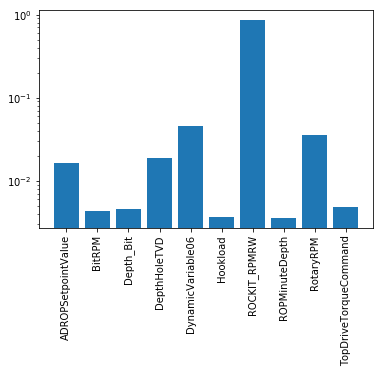

In [28]:
#Apply threshold to only use top 25% of features
#threshold = desc['75%'] #Top 25% quartile
threshold = desc['50%'] #Top 50% quartile
#threshold = desc['25%'] #Top 75% quartile

top_indices = np.argwhere(nz_importances > threshold)
top_features = nz_features[top_indices].flatten()
top_importances = nz_importances[top_indices].flatten()

#Plot the data
plt.xticks(rotation=90)
plt.bar(top_features, top_importances, log=True)

### Sort the data by size

<BarContainer object of 10 artists>

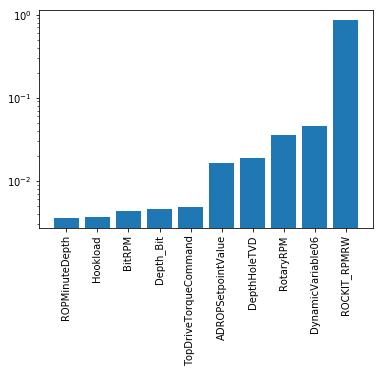

In [29]:
sorted_indices = np.argsort(top_importances)
sorted_features = top_features[sorted_indices]
sorted_importances = top_importances[sorted_indices]

#Plot the sorted values
plt.xticks(rotation=90)
plt.bar(sorted_features, sorted_importances, log=True)

In [30]:
sorted_features

array(['ROPMinuteDepth', 'Hookload', 'BitRPM', 'Depth_Bit',
       'TopDriveTorqueCommand', 'ADROPSetpointValue', 'DepthHoleTVD',
       'RotaryRPM', 'DynamicVariable06', 'ROCKIT_RPMRW'], dtype=object)

# Data Frame of Top Features

In [31]:
#Top features in Data Frame
reduced_features = features[sorted_features]
reduced_features.head(2)

,ROPMinuteDepth,Hookload,BitRPM,Depth_Bit,TopDriveTorqueCommand,ADROPSetpointValue,DepthHoleTVD,RotaryRPM,DynamicVariable06,ROCKIT_RPMRW
ReportDateTime,,,,,,,,,,
2018-06-13 16:24:00,0.77396,138.951660,80.078827,9329.415039,9398.339844,115.0,9329.415039,80.078827,3477.801514,80.0
2018-06-13 16:25:00,0.76646,139.674774,80.014908,9330.672852,9217.603516,115.0,9330.672852,80.014908,3473.287598,80.0


In [32]:
#Put values in array for models
X_reduced = reduced_features.values

In [33]:
#Object Shapes
print("Labels Row Count:",labels.shape[0])
print("Features Row Count:",reduced_features.shape[0])
print("Features Column Count:",reduced_features.shape[1])

Labels Row Count: 118050
Features Row Count: 118050
Features Column Count: 10


# EDA for reduced feature set

In [34]:
label_column =  'ROCKIT_OnOff'
eda = Xplorer(df=reduced_features, y = label_column)

Cannot log read_data properly.


## General data statistics

In [35]:
eda.print_stats()

 
Diagnostic Report:
 
-- Type Table --
         Count
Type          
float64     10
 
Number of observations:	 118050
Number of features:	 10
Observations with at least 1 missing value(s): 0 (0.0%)
Features with at least 1 missing value(s): 0 (0.0%)
 
-- Missing Cells Table --
                       na_count  na_percentage
ROPMinuteDepth                0            0.0
Hookload                      0            0.0
BitRPM                        0            0.0
Depth_Bit                     0            0.0
TopDriveTorqueCommand         0            0.0
ADROPSetpointValue            0            0.0
DepthHoleTVD                  0            0.0
RotaryRPM                     0            0.0
DynamicVariable06             0            0.0
ROCKIT_RPMRW                  0            0.0
 
Total missing cells: 0 (0.0%) 
 
-- Detailed Stats --
 
 
===== Column: 'ROPMinuteDepth' =====
count    1.180500e+05
mean     1.475345e+02
std      1.878157e+04
min      0.000000e+00
25%      5.127000e-

In [36]:
columnNames = []

for col in reduced_features.columns: 
    columnNames.append(col)

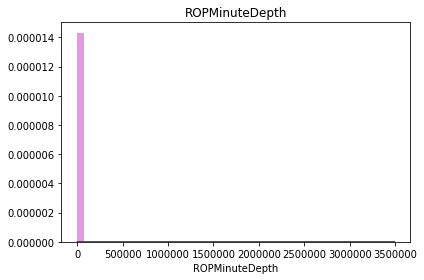

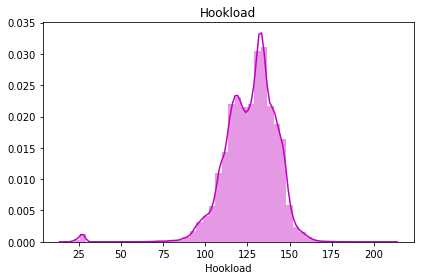

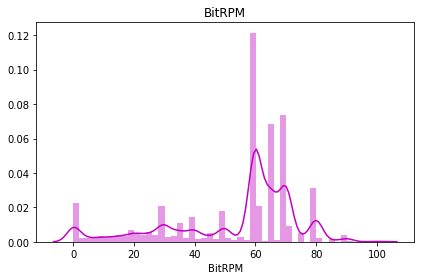

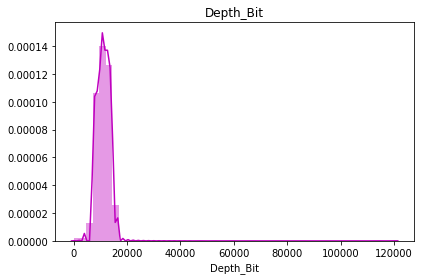

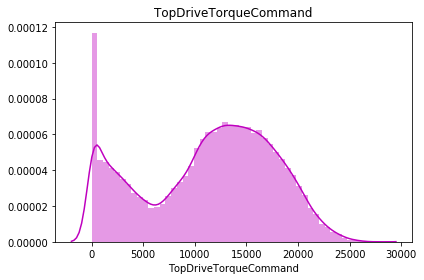

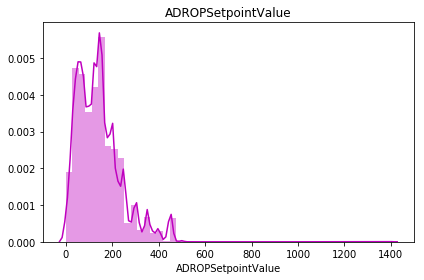

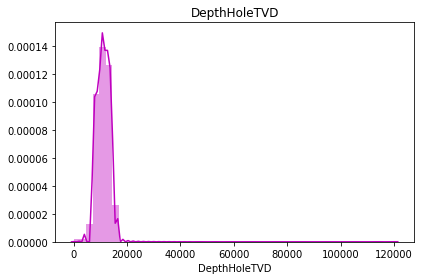

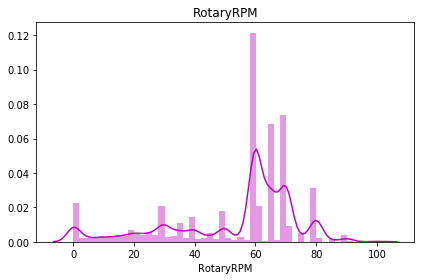

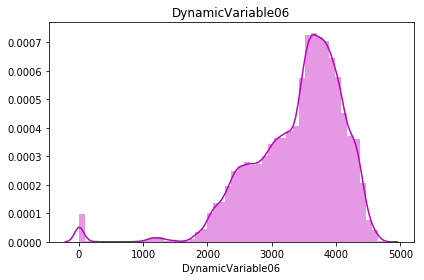

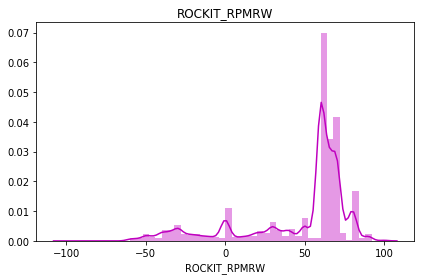

In [37]:
eda.explore_feature_variation(col = columnNames)

## Function to set Classifeir Window

In [33]:
#Function to set classifer window
def window(features, labels, window_len=4, jump_ahead=10):
    X, y = [], []
    
    for i in range(features.shape[0] - window_len):
    #for i in range(features.shape[0] - window_len - jump_ahead):
    
        start_idx = i
        stop_idx = start_idx + window_len

        window_X = features[start_idx:stop_idx, :]
        
        window_y = labels[stop_idx]
        #window_y = labels[stop_idx + jump_ahead]

        X.append(window_X)
        y.append(window_y)

    return np.array(X), np.array(y)

## Classification Objects

In [34]:
#Standard Scaler object
scaler = StandardScaler()

In [35]:
#Apply standard scaler to X-reduced data set
X_scaled = scaler.fit_transform(X_reduced)

In [36]:
#set window scale
window_len = 10
X_windowed, y_windowed = window(X_scaled, y, window_len)

In [37]:
X_windowed.shape

(118040, 10, 10)

In [38]:
#count on to flatten features to 2 dimensions
feat_dims = X_windowed.shape[1:]
flat_feat_len = np.product(feat_dims)
flat_feat_len

100

# Create Training and Test Data Sets

In [39]:
#create Classifier Window test/train split data
X_train, X_test, y_train, y_test =  train_test_split(X_windowed, y_windowed, train_size=0.8, shuffle=False)

#Flatten the train and test data set
X_train = X_train.reshape((-1, flat_feat_len))
X_test = X_test.reshape((-1, flat_feat_len))

In [40]:
#create Static test/train split data
X_train_st, X_test_st, y_train_st, y_test_st =  train_test_split(X_scaled, y, train_size=0.8, shuffle=False)

# SVM Classifier Window Model Build

In [41]:
### SVM Grid Search if needed after inital model is run

In [42]:
#create SVM Classifier
svm_clf = svm.SVC(kernel='rbf')

In [43]:
#train the model using the training set
svm_clf.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [44]:
#Predict the response for test dataset
y_pred = svm_clf.predict(X_test)

# Plotting Results

In [45]:
viz_column = 'BitRPM'

viz_column_idx = np.argwhere(sorted_features == viz_column)[0, 0]
#viz_column_idx

In [46]:
#Get dimensions for reshaping for visuals
reshape1 = X_windowed.shape[1]
reshape2 = X_windowed.shape[2]

In [47]:
# Reshape to recover the structure
#X_test_reshaped = X_test.reshape((-1, 10, 10))
X_test_reshaped = X_test.reshape((-1, reshape1, reshape2))

# Get the current timestep (t) before the forecast (t+1)
X_test_t = X_test_reshaped[:, window_len-1, :]

In [48]:
# Get the interested column index
viz_series = X_test_t[:, viz_column_idx]
#viz_series

In [49]:
num_viz_points = 500
time_steps = np.arange(num_viz_points)

## Ground truth 

In [50]:
true_colors = np.empty_like(y_test[:num_viz_points], dtype=np.str)

In [51]:
true_colors[y_test[:num_viz_points] == 0] = 'g'
true_colors[y_test[:num_viz_points] == 1] = 'r'

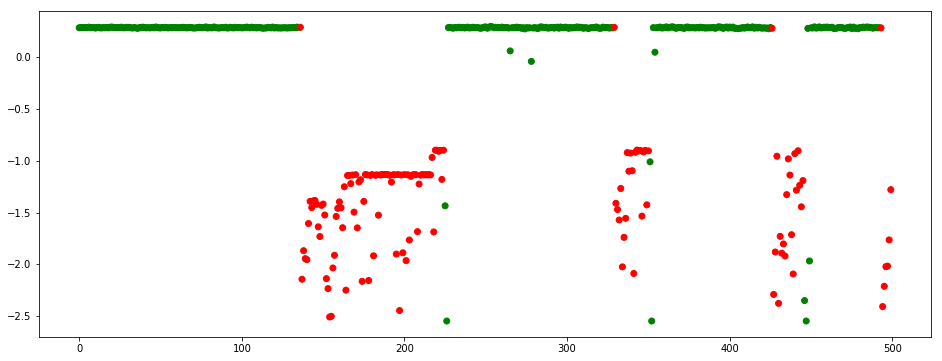

In [52]:
fig = plt.figure(figsize=(16, 6))

plt.scatter(time_steps, viz_series[:num_viz_points], c=true_colors)

## Prediction

In [53]:
pred_colors = np.empty_like(y_pred[:num_viz_points], dtype=np.str)

pred_colors[y_pred[:num_viz_points] == 0] = 'g'
pred_colors[y_pred[:num_viz_points] == 1] = 'r'

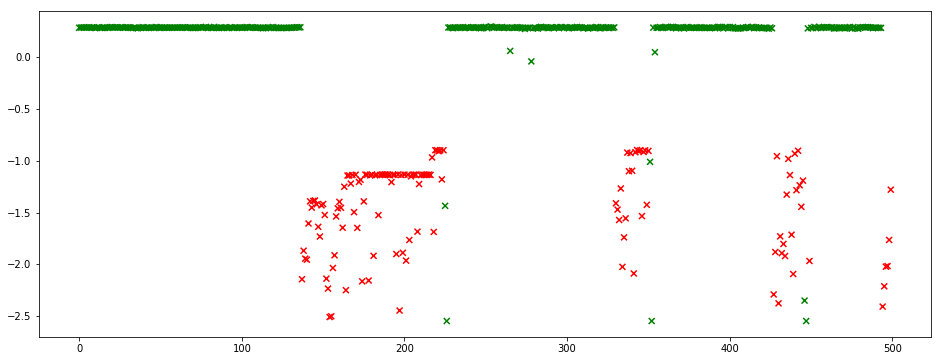

In [54]:
fig = plt.figure(figsize=(16, 6))

plt.scatter(time_steps, viz_series[:num_viz_points], c=pred_colors, marker='x')

## Ground Truth and Prediction

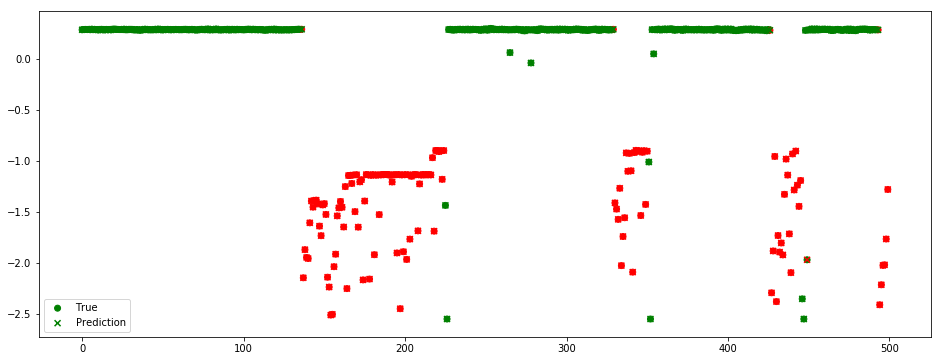

In [55]:
fig = plt.figure(figsize=(16, 6))

plt.scatter(time_steps, viz_series[:num_viz_points], c=true_colors, label='True')
plt.scatter(time_steps, viz_series[:num_viz_points], c=pred_colors, marker='x', label='Prediction')

plt.legend()

# Pull data out as CSV

In [56]:
split = 0.8
split_idx = int(reduced_features.shape[0] * 0.8)
split_idx

94440

In [57]:
X_viz = reduced_features[split_idx:]
y_viz = labels[split_idx:]

In [58]:
#Scale the data set
X_viz_scaled = scaler.transform(X_viz)

#Create split
X_viz_windowed, y_viz_windowed  = window(X_viz_scaled, y_viz, window_len=window_len)

#Flatten split
X_viz_windowed = X_viz_windowed.reshape((-1, flat_feat_len))

In [59]:
#Reshape the split
X_viz_windowed = X_viz_windowed.reshape((-1, flat_feat_len))

In [60]:
#Run through the model
pred_viz = svm_clf.predict(X_viz_windowed)

In [61]:
#Create the series needed
viz_series = X_viz[window_len-1:][viz_column]
viz_labels = y_viz[window_len:]

In [62]:
#Create data frame for use
viz_df = pd.DataFrame(viz_series[1:])

viz_df['label'] = viz_labels
viz_df['pred'] = pred_viz

#View two rows
viz_df.head(2)

,BitRPM,label,pred
ReportDateTime,,,
2019-02-14 04:53:00,59.987209,0.0,0.0
2019-02-14 04:54:00,59.870029,0.0,0.0


### SVM Classifier Window Metrics

In [63]:
# Model Accuracy: how often is the classifier correct?
print("SVM Classifier Window Accuracy:",metrics.accuracy_score(y_test, y_pred))

# Model Precision: what percentage of positive tuples are labeled as such?
print("SVM Classifier Window Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("SVM Classifier Window Recall:",metrics.recall_score(y_test, y_pred))

# Model F1 Score
print("SVM Classifier Window F1 Score:",metrics.f1_score(y_test, y_pred))


SVM Classifier Window Accuracy: 0.9795408336157235
SVM Classifier Window Precision: 0.9593023255813954
SVM Classifier Window Recall: 0.9665484815785417
SVM Classifier Window F1 Score: 0.9629117714812254


In [64]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[16855   266]
 [  217  6270]]
              precision    recall  f1-score   support

         0.0       0.99      0.98      0.99     17121
         1.0       0.96      0.97      0.96      6487

   micro avg       0.98      0.98      0.98     23608
   macro avg       0.97      0.98      0.97     23608
weighted avg       0.98      0.98      0.98     23608



# SVM Static Model Build

In [65]:
## SVM Static Model

In [66]:
#create SVM Classifier
#--svm_clf_static = svm.SVC(kernel='rbf')

In [67]:
#train the model using the training set
#--svm_clf_static.fit(X_train_st, y_train_st)

In [68]:
#Predict the response for test dataset
#--y_pred_st = svm_clf_static.predict(X_test_st)

### SVM Static Model Metrics

In [69]:
# Model Accuracy: how often is the classifier correct?
#--print("SVM Static Model Accuracy:",metrics.accuracy_score(y_test_st, y_pred_st))

# Model Precision: what percentage of positive tuples are labeled as such?
#--print("SVM Static Model Precision:",metrics.precision_score(y_test_st, y_pred_st))

# Model Recall: what percentage of positive tuples are labelled as such?
#--print("SVM Static Model Recall:",metrics.recall_score(y_test_st, y_pred_st))

# Model F1 Score
#--print("SVM Static Model F1 Score:",metrics.f1_score(y_test_st, y_pred_st))

# Logistic Regression

In [70]:
logistic_clf = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial').fit(X_train, y_train)

In [71]:
y_pred_logistic = logistic_clf.predict(X_test)

In [72]:
# Model Accuracy: how often is the classifier correct?
print("Logistic Regression Classifier Window Accuracy:",metrics.accuracy_score(y_test, y_pred_logistic))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Logistic Regression Classifier Window Precision:",metrics.precision_score(y_test, y_pred_logistic))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Logistic Regression Classifier Window Recall:",metrics.recall_score(y_test, y_pred_logistic))

# Model F1 Score
print("Logistic Regression Classifier Window F1 Score:",metrics.f1_score(y_test, y_pred_logistic))

Logistic Regression Classifier Window Accuracy: 0.9753473398847848
Logistic Regression Classifier Window Precision: 0.9523517695725449
Logistic Regression Classifier Window Recall: 0.9582241405888701
Logistic Regression Classifier Window F1 Score: 0.9552789303826649


# Random Forest Classifier Window Build

In [73]:
# use smaller n_estimator
rf_clf = RandomForestClassifier(n_estimators = 10, random_state = 42)

In [74]:
# Train the model on training data
rf_clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [75]:
# Use the forest's predict method on the test data
y_pred_rf = rf_clf.predict(X_test)

# All Results

In [76]:
print("Resampled Data at 1 minute intervals")
print(" ")
# Model Accuracy: how often is the classifier correct?
print("SVM Classifier Window Accuracy:",metrics.accuracy_score(y_test, y_pred))

# Model Precision: what percentage of positive tuples are labeled as such?
print("SVM Classifier Window Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("SVM Classifier Window Recall:",metrics.recall_score(y_test, y_pred))

# Model F1 Score
print("SVM Classifier Window F1 Score:",metrics.f1_score(y_test, y_pred))
print(" ")


# Model Accuracy: how often is the classifier correct?
print("LR Classifier Window Accuracy:",metrics.accuracy_score(y_test, y_pred_logistic))

# Model Precision: what percentage of positive tuples are labeled as such?
print("LR Classifier Window Precision:",metrics.precision_score(y_test, y_pred_logistic))

# Model Recall: what percentage of positive tuples are labelled as such?
print("LR Classifier Window Recall:",metrics.recall_score(y_test, y_pred_logistic))

# Model F1 Score
print("LR Classifier Window F1 Score:",metrics.f1_score(y_test, y_pred_logistic))
print(" ")

# Model Accuracy: how often is the classifier correct?
print("RF Classifier Window Accuracy:",metrics.accuracy_score(y_test, y_pred_rf))

# Model Precision: what percentage of positive tuples are labeled as such?
print("RF Classifier Window Precision:",metrics.precision_score(y_test, y_pred_rf))

# Model Recall: what percentage of positive tuples are labelled as such?
print("RF Classifier Window Recall:",metrics.recall_score(y_test, y_pred_rf))

# Model F1 Score
print("RF Classifier Window F1 Score:",metrics.f1_score(y_test, y_pred_rf))

Resampled Data at 1 minute intervals
 
SVM Classifier Window Accuracy: 0.9795408336157235
SVM Classifier Window Precision: 0.9593023255813954
SVM Classifier Window Recall: 0.9665484815785417
SVM Classifier Window F1 Score: 0.9629117714812254
 
LR Classifier Window Accuracy: 0.9753473398847848
LR Classifier Window Precision: 0.9523517695725449
LR Classifier Window Recall: 0.9582241405888701
LR Classifier Window F1 Score: 0.9552789303826649
 
RF Classifier Window Accuracy: 0.9692477126397832
RF Classifier Window Precision: 0.9634754625905069
RF Classifier Window Recall: 0.9230769230769231
RF Classifier Window F1 Score: 0.9428436466698158


# ROC / AUC Curves
## Classifier Window Model Build with Probablities

In [77]:
#create SVM Classifier
#--svm_clf_prob = svm.SVC(kernel='rbf', probability=True )

In [78]:
#train the model using the training set
#--svm_clf_prob.fit(X_train, y_train)

In [79]:
#Predict the response for test dataset
#--y_pred_prob = svm_clf_prob.predict(X_test)

In [80]:
# predict probabilities
#--probs = svm_clf_prob.predict_proba(X_test)
# keep probabilities for the positive outcome only
#--probs = probs[:, 1]


In [81]:
# calculate AUC
#--auc = roc_auc_score(y_test, probs)
#--print('AUC: %.3f' % auc)
# calculate roc curve
#--fpr, tpr, thresholds = roc_curve(y_test, probs)

In [82]:
# plot no skill
#--pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
#--pyplot.plot(fpr, tpr, marker='.')
# show the plot
#--pyplot.show()